In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train.csv

### 기본적인 정보 확인

In [3]:
df = pd.read_csv("../../../../estsoft/data/train.csv")

In [4]:
df.head()

county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       0                   0  
1  2021-09-01 00:00:00              0       1                   0  
2  2021-09-01 00:00:00              0       2                   1  
3  2021-09-01 00:00:00              0       3                   1  
4  2021-09-01 00:00:00              0       4                   2

In [5]:
df.tail()

county  is_business  product_type   target  is_consumption  \
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
2018347  2023-05-31 23:00:00            637  2018347                  64  
2018348  2023-05-31 23:00:00            637  2018348                  59  
2018349  2023-05-31 23:00:00            637  2018349                  59  
2018350  2023-05-31 23:00:00            637  2018350                  60  
2018351  2023-05-31 23:00:00            637  2018351                  60

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [7]:
df.describe()

county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id        row_id  prediction_unit_id  
count   2.018352e+06  2.018352e+06        2.018352e+06  
mean    3.218746e+02  1.009176e+06        3.304538e+01  
std     1.826343e+02  5.826482e+05        1.959059e+01  
min     0.000000e+00  0.000000e+00        0.000000e+00  
25%     1.660000e+02  5.045878e+05        1.600000e+01  
50%     3.230000e+02  1.009176e+06        3.300000e+01  
75%     4.790000e+02  1.513763e+06        5.000000e+01  
max     6.370000e+02  2.018351e+06        6.800000e+01

In [8]:
df.isnull().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [9]:
df_prod =df[df['is_consumption']==0]
df_prod.isnull().sum()

county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [10]:
df_cons = df[df['is_consumption']==1]
df_cons.isnull().sum()

county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [11]:
df_null = df[df.isnull().any(axis=1)]
df_null['datetime'].value_counts()

datetime
2022-10-30 03:00:00    136
2022-03-27 03:00:00    134
2023-03-26 03:00:00    132
2021-10-31 03:00:00    126
Name: count, dtype: int64

- 특정 날짜의 03시에만 null값이 있음

In [12]:
# # row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [13]:
df[df['datetime']=="2022-03-27 03:00:00"]

county  is_business  product_type  target  is_consumption  \
634866       0            0             1     NaN               0   
634867       0            0             1     NaN               1   
634868       0            0             2     NaN               0   
634869       0            0             2     NaN               1   
634870       0            0             3     NaN               0   
...        ...          ...           ...     ...             ...   
634995      15            1             0     NaN               1   
634996      15            1             1     NaN               0   
634997      15            1             1     NaN               1   
634998      15            1             3     NaN               0   
634999      15            1             3     NaN               1   

                   datetime  data_block_id  row_id  prediction_unit_id  
634866  2022-03-27 03:00:00            207  634866                   0  
634867  2022-03-27 03:00:00            207  634867                   0  
634868  2022-03-27 03:00:00            207  634868                   1  
634869  2022-03-27 03:00:00            207  634869                   1  
634870  2022-03-27 03:00:00            207  634870                   2  
...                     ...            ...     ...                 ...  
634995  2022-03-27 03:00:00            207  634995                  64  
634996  2022-03-27 03:00:00            207  634996                  59  
634997  2022-03-27 03:00:00            207  634997                  59  
634998  2022-03-27 03:00:00            207  634998                  60  
634999  2022-03-27 03:00:00            207  634999                  60  

[134 rows x 9 columns]

In [14]:
df[df['datetime']=="2022-10-30 02:00:00"]

county  is_business  product_type   target  is_consumption  \
1332320       0            0             1    0.000               0   
1332321       0            0             1  490.487               1   
1332322       0            0             2    0.000               0   
1332323       0            0             2   24.104               1   
1332324       0            0             3    0.109               0   
...         ...          ...           ...      ...             ...   
1332451      15            1             0  186.505               1   
1332452      15            1             1    0.000               0   
1332453      15            1             1   31.650               1   
1332454      15            1             3    0.028               0   
1332455      15            1             3  305.152               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
1332320  2022-10-30 02:00:00            424  1332320                   0  
1332321  2022-10-30 02:00:00            424  1332321                   0  
1332322  2022-10-30 02:00:00            424  1332322                   1  
1332323  2022-10-30 02:00:00            424  1332323                   1  
1332324  2022-10-30 02:00:00            424  1332324                   2  
...                      ...            ...      ...                 ...  
1332451  2022-10-30 02:00:00            424  1332451                  64  
1332452  2022-10-30 02:00:00            424  1332452                  59  
1332453  2022-10-30 02:00:00            424  1332453                  59  
1332454  2022-10-30 02:00:00            424  1332454                  60  
1332455  2022-10-30 02:00:00            424  1332455                  60  

[136 rows x 9 columns]

In [15]:
df[df['datetime']=="2022-10-30 04:00:00"]

county  is_business  product_type   target  is_consumption  \
1332592       0            0             1    0.004               0   
1332593       0            0             1  470.472               1   
1332594       0            0             2    0.000               0   
1332595       0            0             2   24.548               1   
1332596       0            0             3    1.534               0   
...         ...          ...           ...      ...             ...   
1332723      15            1             0  193.844               1   
1332724      15            1             1    0.000               0   
1332725      15            1             1   33.521               1   
1332726      15            1             3    0.025               0   
1332727      15            1             3  320.644               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
1332592  2022-10-30 04:00:00            424  1332592                   0  
1332593  2022-10-30 04:00:00            424  1332593                   0  
1332594  2022-10-30 04:00:00            424  1332594                   1  
1332595  2022-10-30 04:00:00            424  1332595                   1  
1332596  2022-10-30 04:00:00            424  1332596                   2  
...                      ...            ...      ...                 ...  
1332723  2022-10-30 04:00:00            424  1332723                  64  
1332724  2022-10-30 04:00:00            424  1332724                  59  
1332725  2022-10-30 04:00:00            424  1332725                  59  
1332726  2022-10-30 04:00:00            424  1332726                  60  
1332727  2022-10-30 04:00:00            424  1332727                  60  

[136 rows x 9 columns]

In [16]:
df_prod0 = df[(df['prediction_unit_id']==0) & (df['is_consumption']==0)].reset_index()
df_cons0 = df[(df['prediction_unit_id']==0) & (df['is_consumption']==1)].reset_index()

In [17]:
df_prod0.head()

index  county  is_business  product_type  target  is_consumption  \
0      0       0            0             1   0.713               0   
1    122       0            0             1   1.132               0   
2    244       0            0             1   0.490               0   
3    366       0            0             1   0.496               0   
4    488       0            0             1   0.149               0   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       0                   0  
1  2021-09-01 01:00:00              0     122                   0  
2  2021-09-01 02:00:00              0     244                   0  
3  2021-09-01 03:00:00              0     366                   0  
4  2021-09-01 04:00:00              0     488                   0

In [18]:
df_cons0.head()

index  county  is_business  product_type  target  is_consumption  \
0      1       0            0             1  96.590               1   
1    123       0            0             1  77.691               1   
2    245       0            0             1  91.594               1   
3    367       0            0             1  87.955               1   
4    489       0            0             1  88.184               1   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       1                   0  
1  2021-09-01 01:00:00              0     123                   0  
2  2021-09-01 02:00:00              0     245                   0  
3  2021-09-01 03:00:00              0     367                   0  
4  2021-09-01 04:00:00              0     489                   0

In [19]:
df_prod0['datetime'] = pd.to_datetime(df_prod0['datetime'])
df_prod0.set_index('datetime', drop=True, inplace=True) 

df_cons0['datetime'] = pd.to_datetime(df_cons0['datetime'])
df_cons0.set_index('datetime', drop=True, inplace=True) 

In [20]:
df_null = df_prod0[df_prod0.isnull().any(axis=1)]
df_null

index  county  is_business  product_type  target  \
datetime                                                                  
2021-10-31 03:00:00   178938       0            0             1     NaN   
2022-03-27 03:00:00   634866       0            0             1     NaN   
2022-10-30 03:00:00  1332456       0            0             1     NaN   
2023-03-26 03:00:00  1806252       0            0             1     NaN   

                     is_consumption  data_block_id   row_id  \
datetime                                                      
2021-10-31 03:00:00               0             60   178938   
2022-03-27 03:00:00               0            207   634866   
2022-10-30 03:00:00               0            424  1332456   
2023-03-26 03:00:00               0            571  1806252   

                     prediction_unit_id  
datetime                                 
2021-10-31 03:00:00                   0  
2022-03-27 03:00:00                   0  
2022-10-30 03:00:00                   0  
2023-03-26 03:00:00                   0

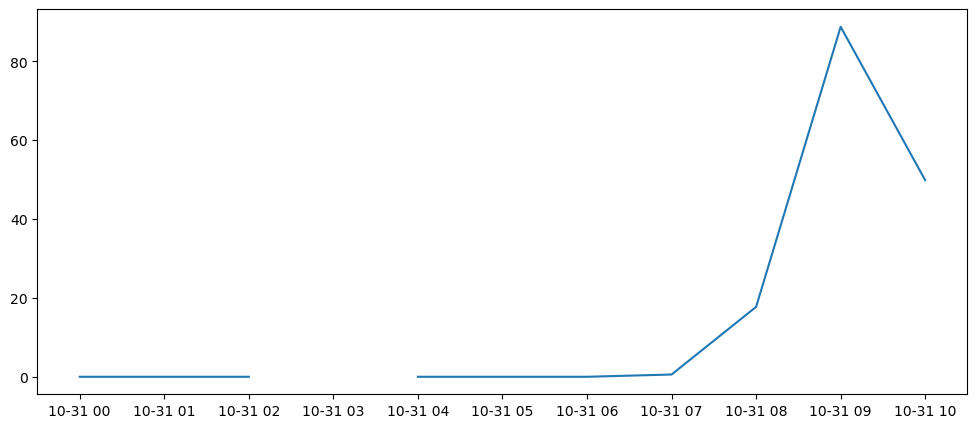

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df_prod0.loc["2021-10-31 00:00:00":"2021-10-31 10:00:00"].target)

In [22]:
df_null = df_cons0[df_cons0.isnull().any(axis=1)]
df_null

index  county  is_business  product_type  target  \
datetime                                                                  
2021-10-31 03:00:00   178939       0            0             1     NaN   
2022-03-27 03:00:00   634867       0            0             1     NaN   
2022-10-30 03:00:00  1332457       0            0             1     NaN   
2023-03-26 03:00:00  1806253       0            0             1     NaN   

                     is_consumption  data_block_id   row_id  \
datetime                                                      
2021-10-31 03:00:00               1             60   178939   
2022-03-27 03:00:00               1            207   634867   
2022-10-30 03:00:00               1            424  1332457   
2023-03-26 03:00:00               1            571  1806253   

                     prediction_unit_id  
datetime                                 
2021-10-31 03:00:00                   0  
2022-03-27 03:00:00                   0  
2022-10-30 03:00:00                   0  
2023-03-26 03:00:00                   0

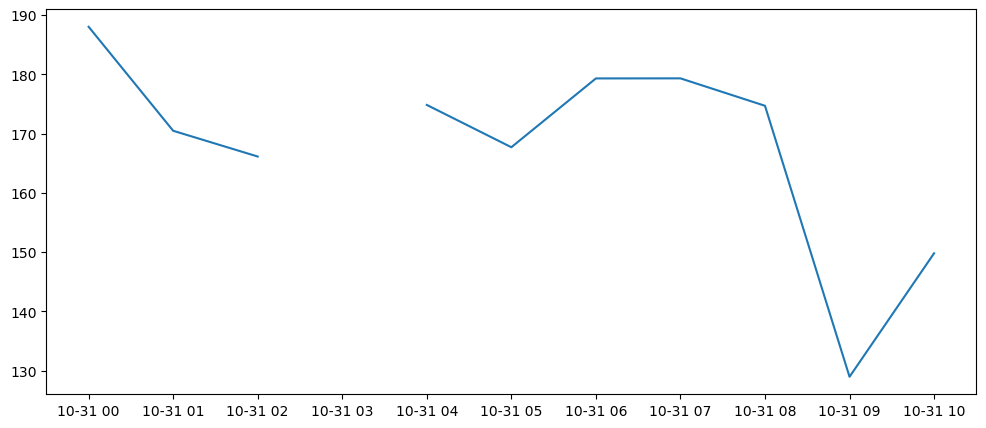

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df_cons0.loc["2021-10-31 00:00:00":"2021-10-31 10:00:00"].target)

In [24]:
df['prediction_unit_id'].value_counts()

prediction_unit_id
0     30624
46    30624
32    30624
33    30624
1     30624
      ...  
47    24000
67    23280
26    19968
41    12144
68     3312
Name: count, Length: 69, dtype: int64

In [25]:
df['data_block_id'].value_counts()

data_block_id
452    3312
450    3312
436    3312
437    3312
438    3312
       ... 
26     2928
27     2928
28     2928
29     2928
0      2928
Name: count, Length: 638, dtype: int64

### 인덱스 변경

In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


In [27]:
# df.index = df['datetime']
# df.index

### categorical column의 데이터 분포 확인

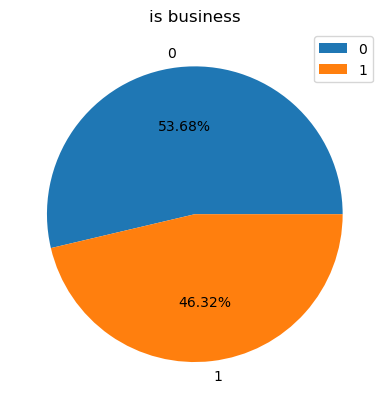

In [28]:
plt.pie(df['is_business'].value_counts(), labels=df['is_business'].unique(), autopct='%.2f%%')
plt.title('is business')
plt.legend()

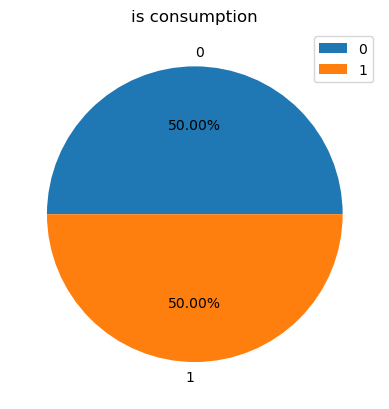

In [29]:
plt.pie(df['is_consumption'].value_counts(), labels=df['is_consumption'].unique(), autopct='%.2f%%')
plt.title('is consumption')
plt.legend()

In [30]:
df[df['is_consumption']==0].head()

county  is_business  product_type  target  is_consumption   datetime  \
0       0            0             1   0.713               0 2021-09-01   
2       0            0             2   0.000               0 2021-09-01   
4       0            0             3   2.904               0 2021-09-01   
6       0            1             0   0.000               0 2021-09-01   
8       0            1             1   0.000               0 2021-09-01   

   data_block_id  row_id  prediction_unit_id  
0              0       0                   0  
2              0       2                   1  
4              0       4                   2  
6              0       6                   3  
8              0       8                   4

In [31]:
df[df['is_consumption']==1].head()

county  is_business  product_type   target  is_consumption   datetime  \
1       0            0             1   96.590               1 2021-09-01   
3       0            0             2   17.314               1 2021-09-01   
5       0            0             3  656.859               1 2021-09-01   
7       0            1             0   59.000               1 2021-09-01   
9       0            1             1  501.760               1 2021-09-01   

   data_block_id  row_id  prediction_unit_id  
1              0       1                   0  
3              0       3                   1  
5              0       5                   2  
7              0       7                   3  
9              0       9                   4

- 소비량 예측 모델, 생산량 예측 모델 따로 만들어서 예측

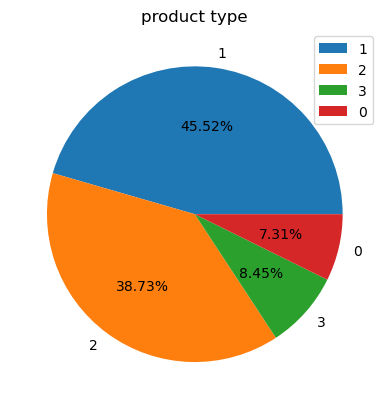

In [32]:
plt.pie(df['product_type'].value_counts(), labels=df['product_type'].unique(), autopct='%.2f%%')
plt.title('product type')
plt.legend()

- prediction_unit_id
    - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

Text(0.5, 1.0, 'prediction_unit_id')

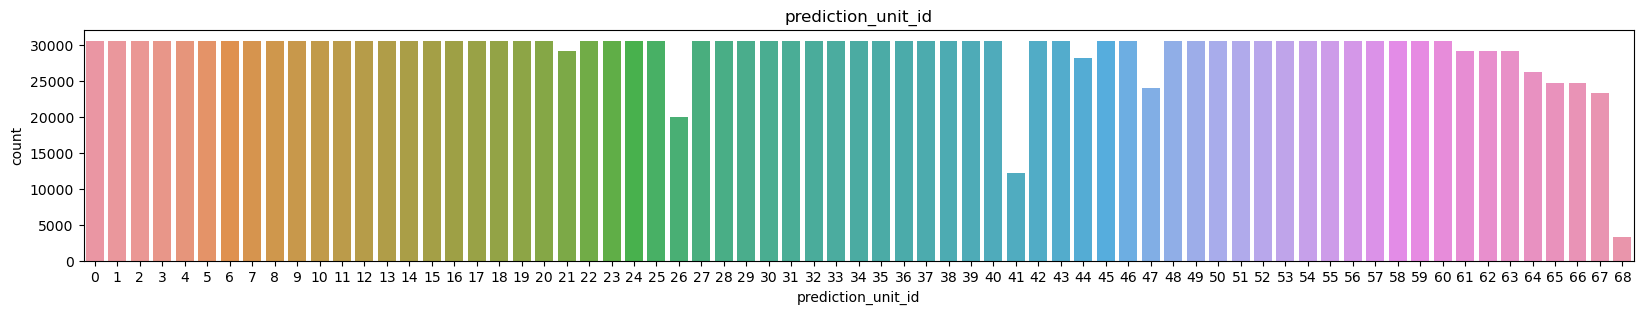

In [33]:
plt.figure(figsize=(20,3))
sns.countplot(x='prediction_unit_id', data=df)
plt.title('prediction_unit_id')

In [34]:
df.head(139)

county  is_business  product_type  target  is_consumption  \
0         0            0             1   0.713               0   
1         0            0             1  96.590               1   
2         0            0             2   0.000               0   
3         0            0             2  17.314               1   
4         0            0             3   2.904               0   
..      ...          ...           ...     ...             ...   
134       1            0             1   0.000               0   
135       1            0             1   2.808               1   
136       1            0             3   0.091               0   
137       1            0             3  21.158               1   
138       1            1             3   0.000               0   

               datetime  data_block_id  row_id  prediction_unit_id  
0   2021-09-01 00:00:00              0       0                   0  
1   2021-09-01 00:00:00              0       1                   0  
2   2021-09-01 00:00:00              0       2                   1  
3   2021-09-01 00:00:00              0       3                   1  
4   2021-09-01 00:00:00              0       4                   2  
..                  ...            ...     ...                 ...  
134 2021-09-01 01:00:00              0     134                   6  
135 2021-09-01 01:00:00              0     135                   6  
136 2021-09-01 01:00:00              0     136                   7  
137 2021-09-01 01:00:00              0     137                   7  
138 2021-09-01 01:00:00              0     138                   8  

[139 rows x 9 columns]

In [35]:
df[df['data_block_id']==634]

county  is_business  product_type   target  is_consumption  \
2005872       0            0             1    3.401               0   
2005873       0            0             1  618.661               1   
2005874       0            0             2    0.000               0   
2005875       0            0             2    4.507               1   
2005876       0            0             3   15.918               0   
...         ...          ...           ...      ...             ...   
2008987      15            1             0  173.048               1   
2008988      15            1             1    0.000               0   
2008989      15            1             1   35.217               1   
2008990      15            1             3    0.000               0   
2008991      15            1             3  161.650               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
2005872 2023-05-28 00:00:00            634  2005872                   0  
2005873 2023-05-28 00:00:00            634  2005873                   0  
2005874 2023-05-28 00:00:00            634  2005874                   1  
2005875 2023-05-28 00:00:00            634  2005875                   1  
2005876 2023-05-28 00:00:00            634  2005876                   2  
...                     ...            ...      ...                 ...  
2008987 2023-05-28 23:00:00            634  2008987                  64  
2008988 2023-05-28 23:00:00            634  2008988                  59  
2008989 2023-05-28 23:00:00            634  2008989                  59  
2008990 2023-05-28 23:00:00            634  2008990                  60  
2008991 2023-05-28 23:00:00            634  2008991                  60  

[3120 rows x 9 columns]

Text(0.5, 1.0, 'county')

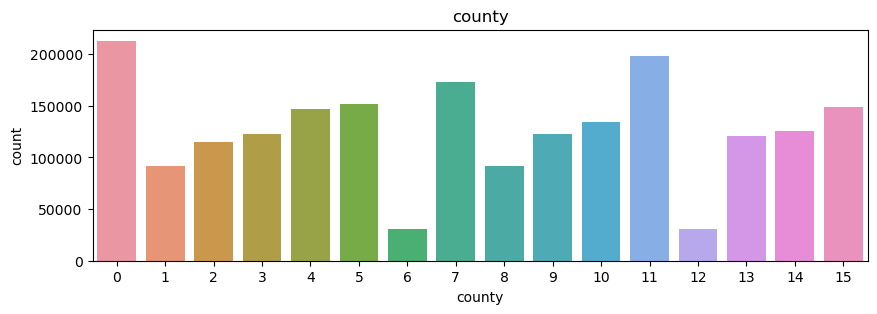

In [36]:
plt.figure(figsize=(10,3))
sns.countplot(x='county', data=df)
plt.title('county')

- 데이터 불균형
    - production_type 
    - county

### 에너지 생산량

In [37]:
# 총생산량
production = df[df['is_consumption']==0]
total = production.groupby('datetime')['target'].sum()
total

datetime
2021-09-01 00:00:00        4.362
2021-09-01 01:00:00       11.852
2021-09-01 02:00:00        1.845
2021-09-01 03:00:00        1.517
2021-09-01 04:00:00        2.492
                         ...    
2023-05-31 19:00:00    11330.989
2023-05-31 20:00:00     4214.015
2023-05-31 21:00:00      856.600
2023-05-31 22:00:00      140.687
2023-05-31 23:00:00      505.379
Name: target, Length: 15312, dtype: float64

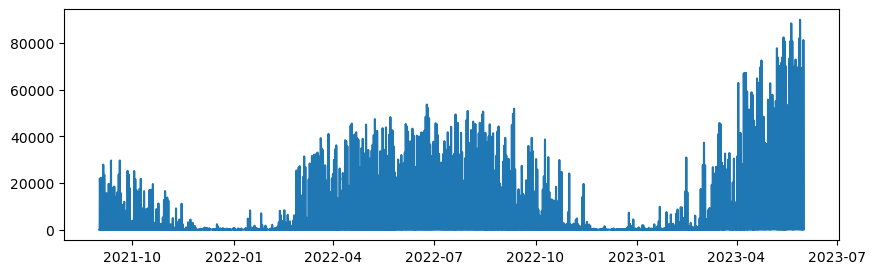

In [38]:
plt.figure(figsize=(10,3))
plt.plot(total)

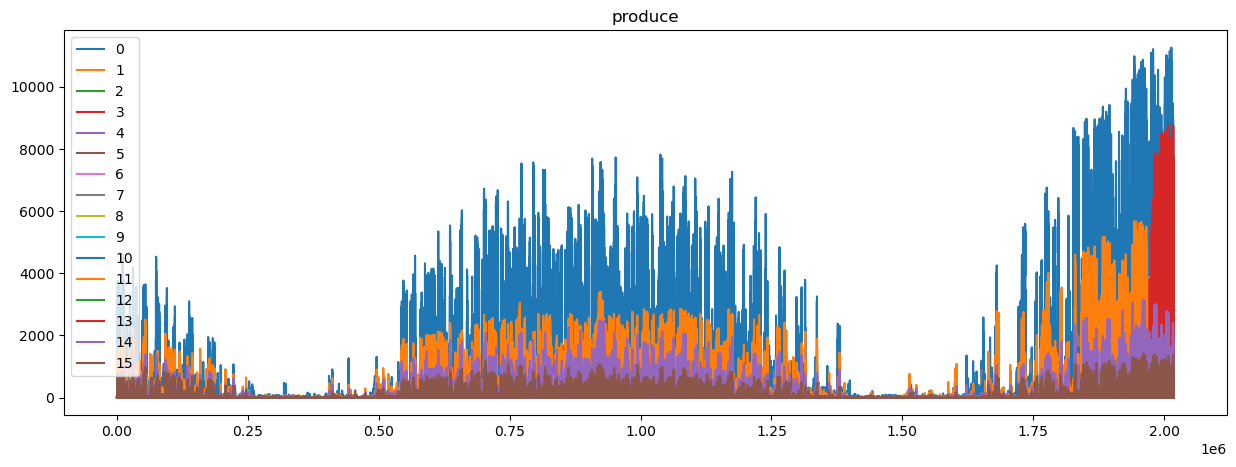

In [39]:
# county별 생산량 비교
df_produce = df[df['is_consumption']==0]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.plot(df_produce[df_produce['county']==i]['target'], label=i)
plt.title('produce')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


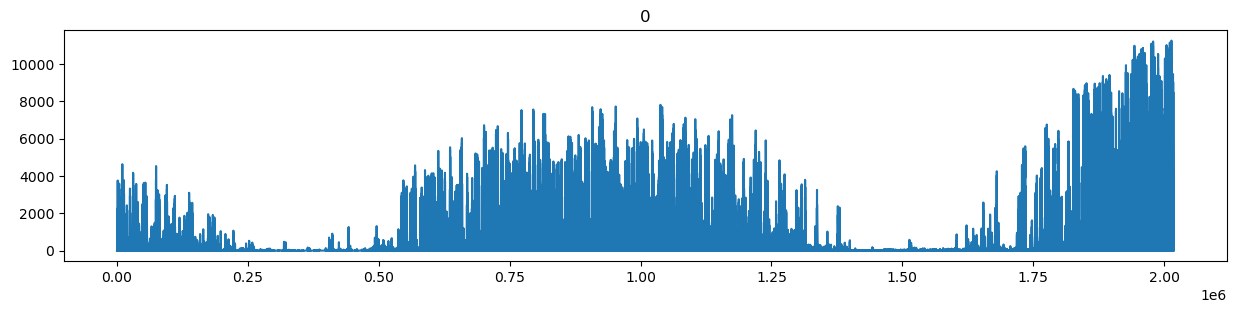

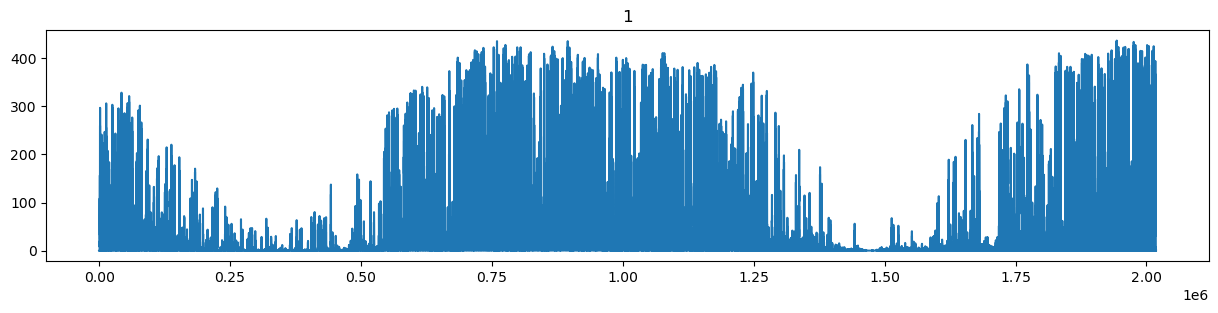

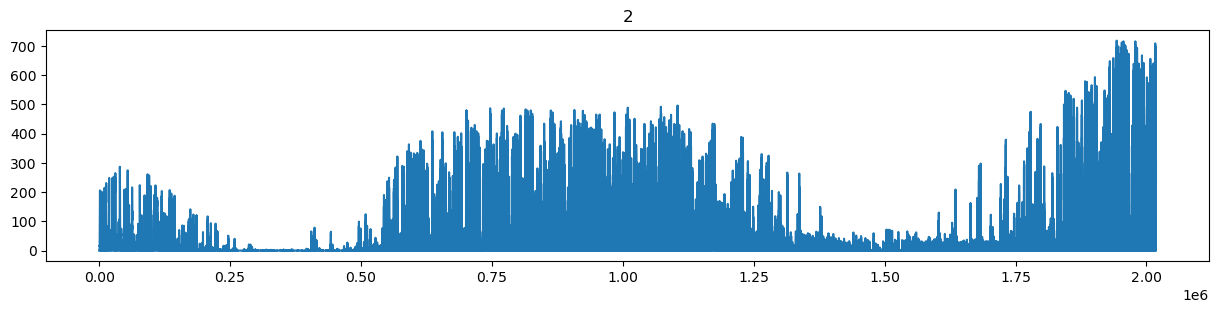

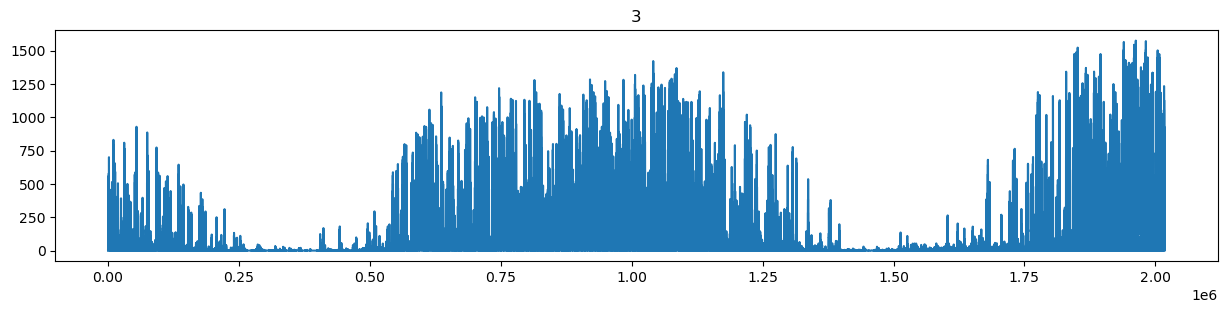

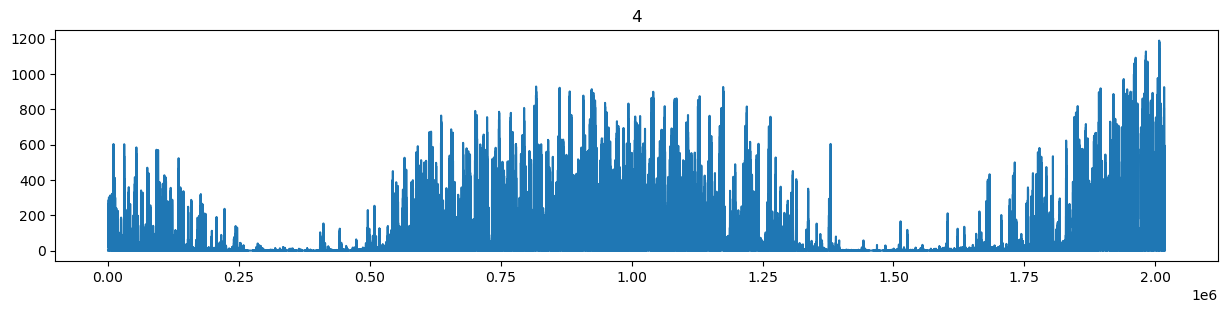

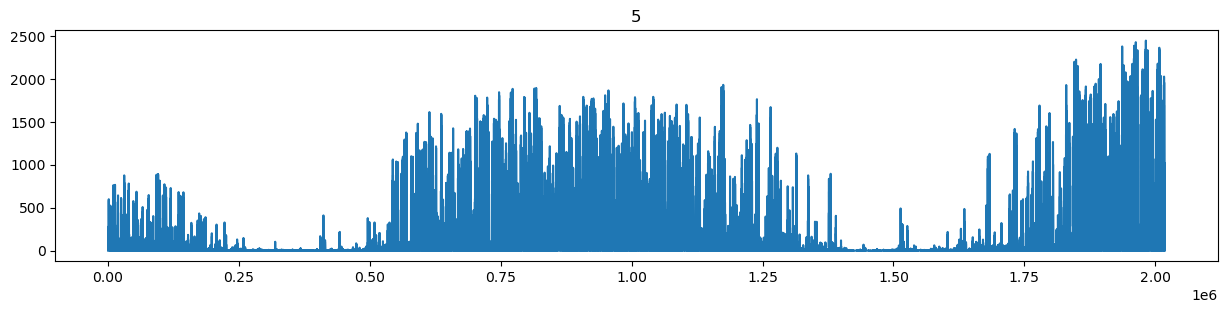

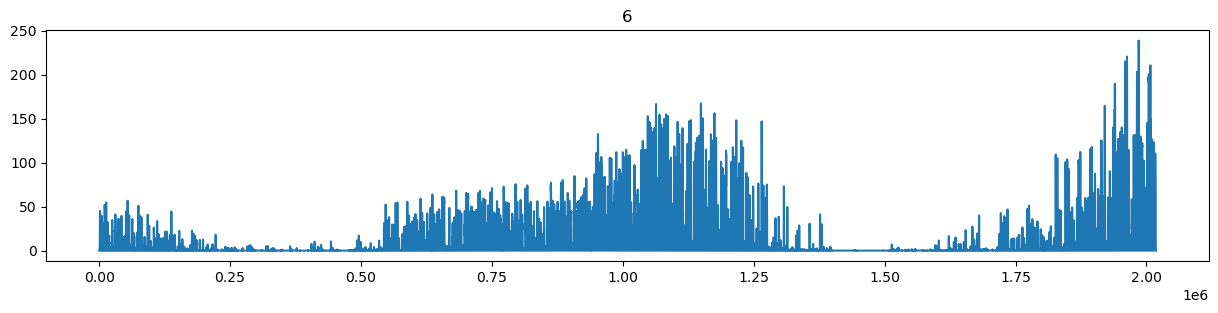

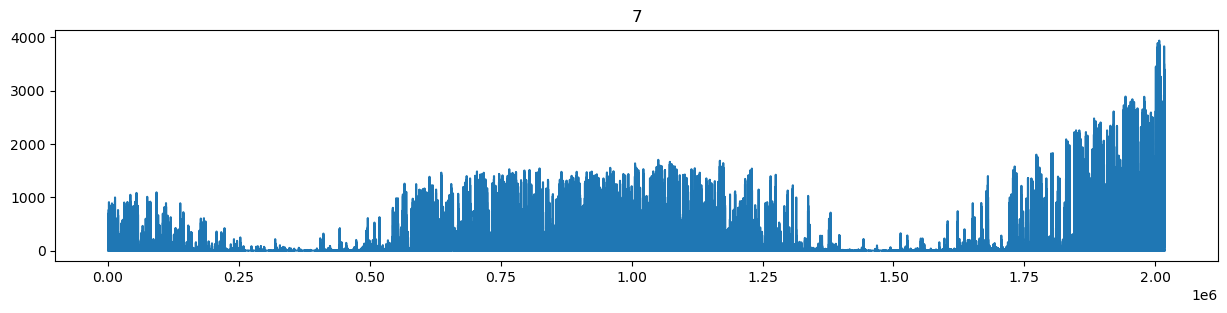

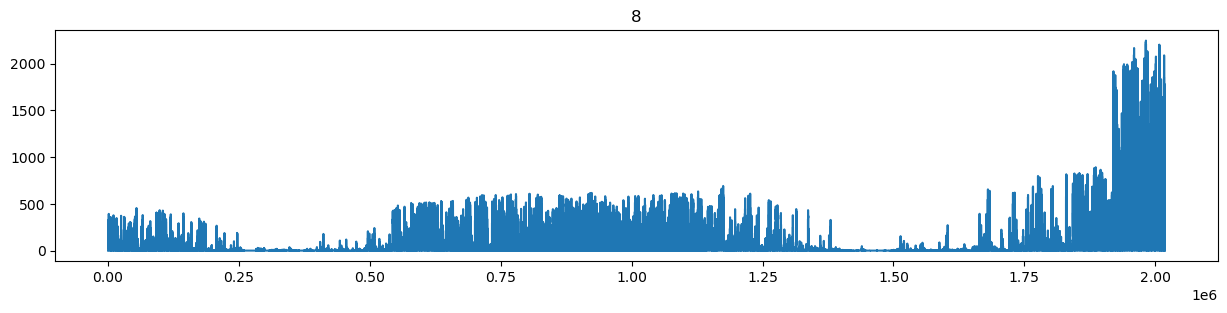

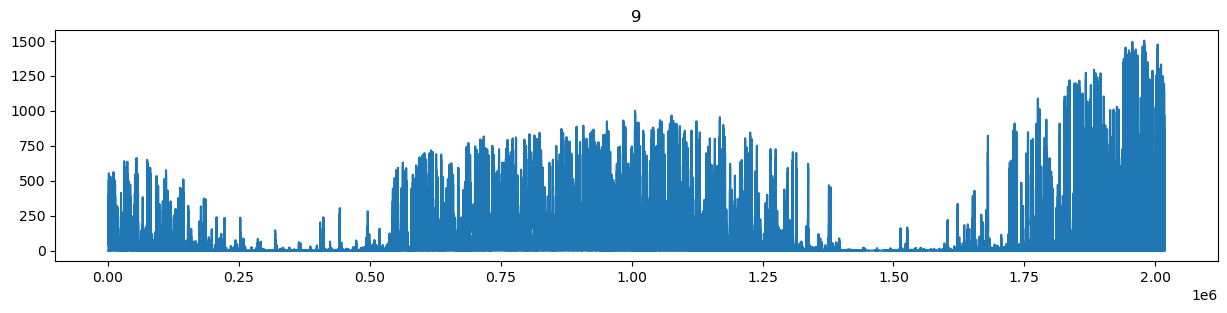

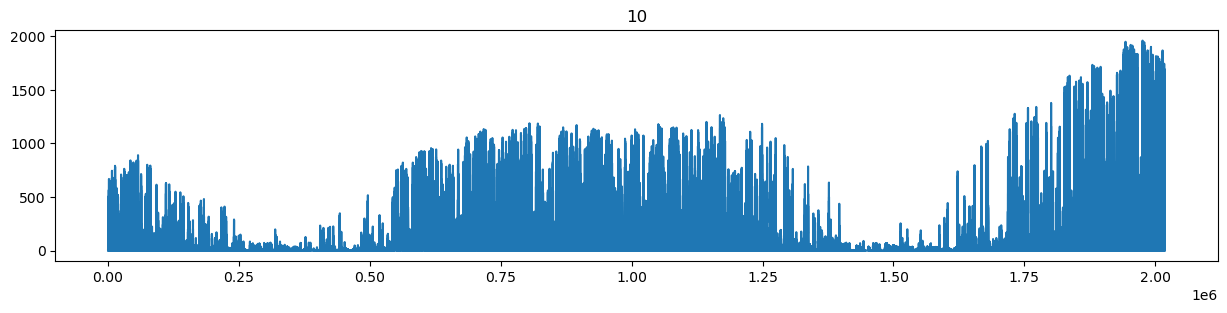

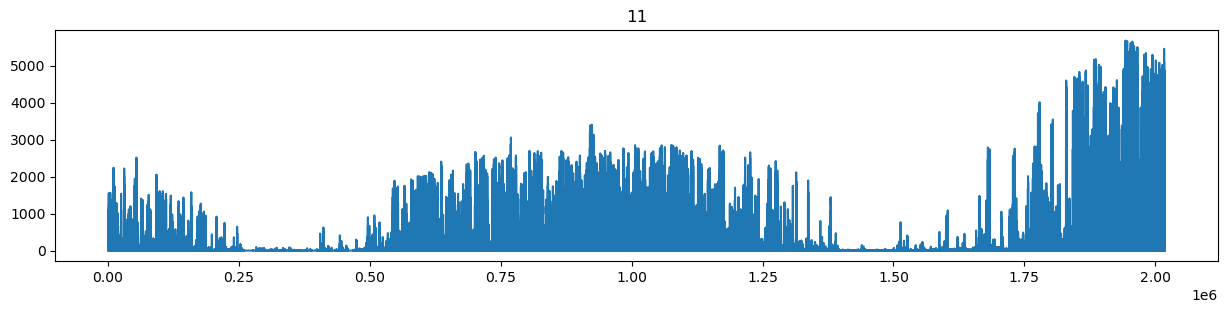

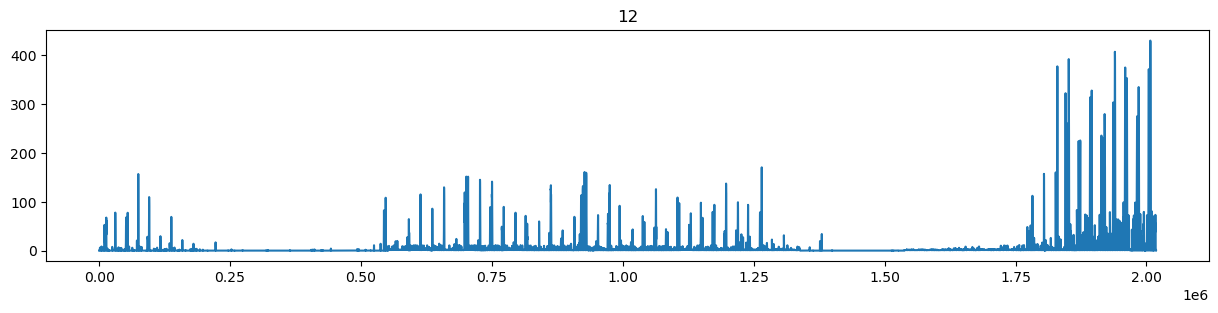

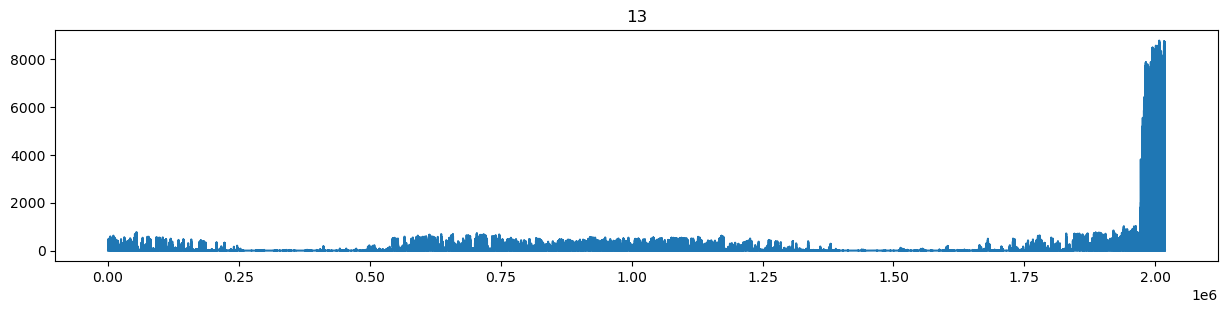

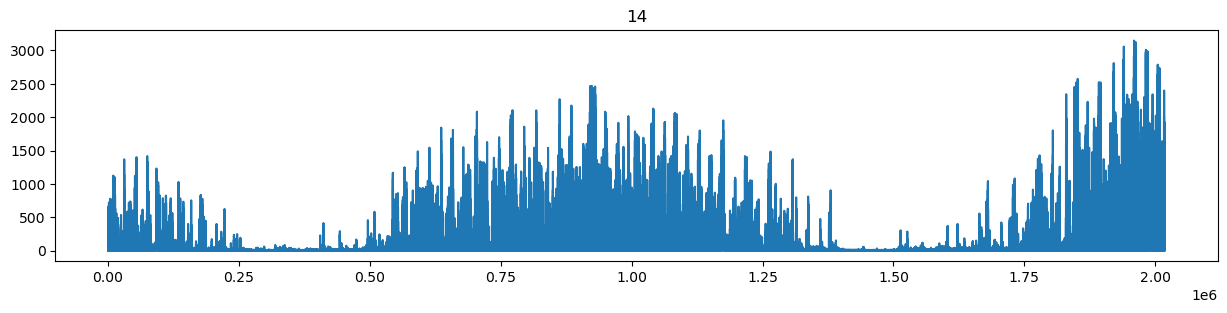

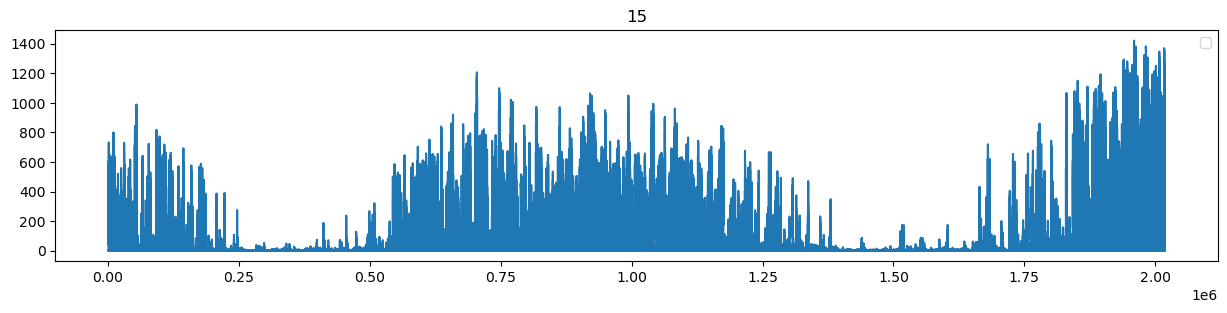

In [40]:
# county별로 살펴보기
df_produce = df[df['is_consumption']==0]
for i in range(len(df['county'].unique())):
    plt.figure(figsize=(15,3))
    plt.plot(df_produce[df_produce['county']==i]['target'])
    plt.title(i)
plt.legend()

In [41]:
# target값이 0인 행 출력 => null값으로 봐야하는 것인지 확인
df_produce[df_produce['target']==0]

county  is_business  product_type  target  is_consumption  \
2             0            0             2     0.0               0   
6             0            1             0     0.0               0   
8             0            1             1     0.0               0   
12            1            0             1     0.0               0   
16            1            1             3     0.0               0   
...         ...          ...           ...     ...             ...   
2018336      14            1             1     0.0               0   
2018338      14            1             2     0.0               0   
2018346      15            1             0     0.0               0   
2018348      15            1             1     0.0               0   
2018350      15            1             3     0.0               0   

                   datetime  data_block_id   row_id  prediction_unit_id  
2       2021-09-01 00:00:00              0        2                   1  
6       2021-09-01 00:00:00              0        6                   3  
8       2021-09-01 00:00:00              0        8                   4  
12      2021-09-01 00:00:00              0       12                   6  
16      2021-09-01 00:00:00              0       16                   8  
...                     ...            ...      ...                 ...  
2018336 2023-05-31 23:00:00            637  2018336                  55  
2018338 2023-05-31 23:00:00            637  2018338                  68  
2018346 2023-05-31 23:00:00            637  2018346                  64  
2018348 2023-05-31 23:00:00            637  2018348                  59  
2018350 2023-05-31 23:00:00            637  2018350                  60  

[351410 rows x 9 columns]

/tmp/ipykernel_3597767/2822754016.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,3))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


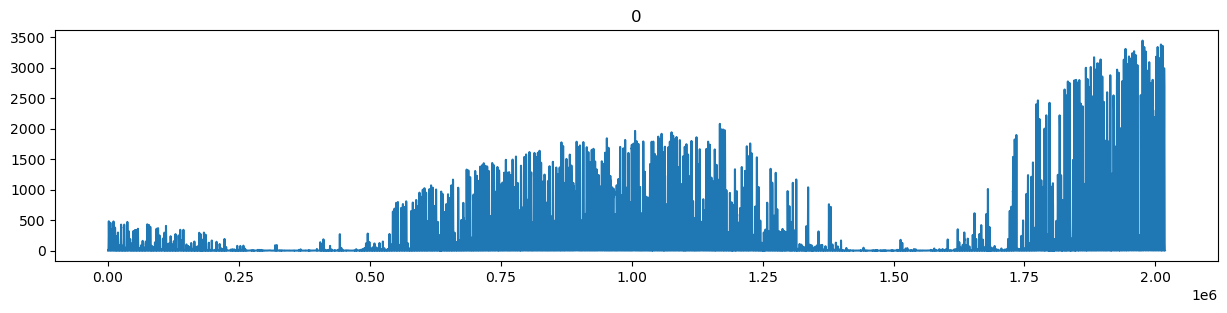

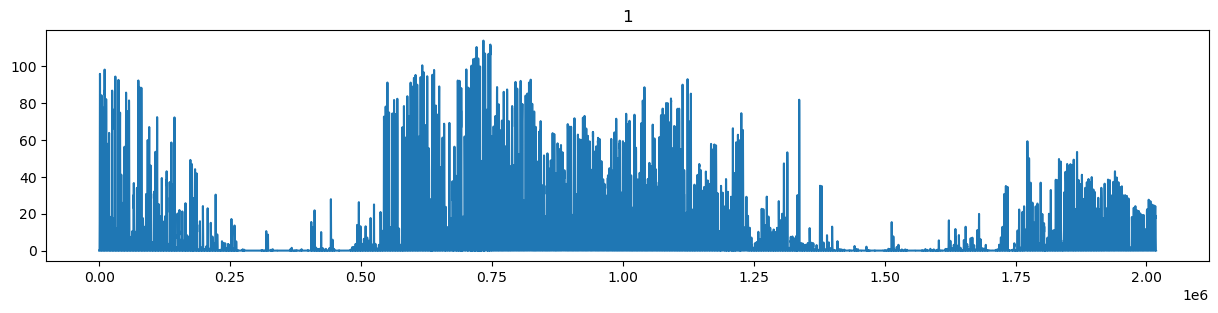

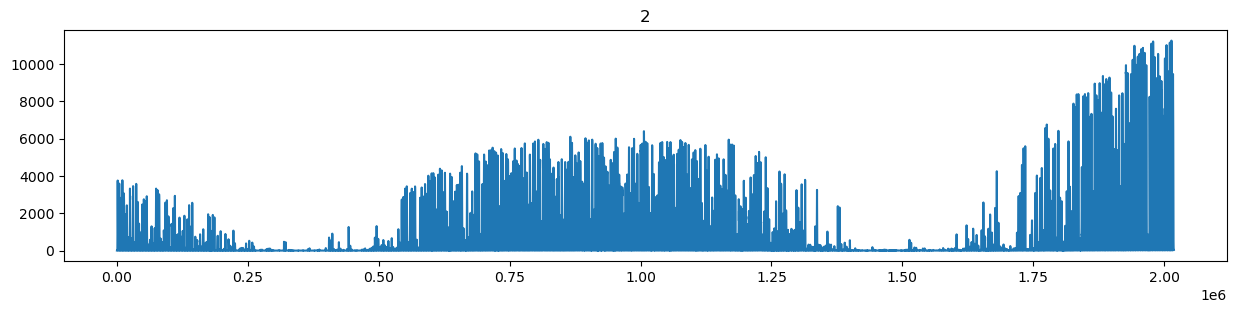

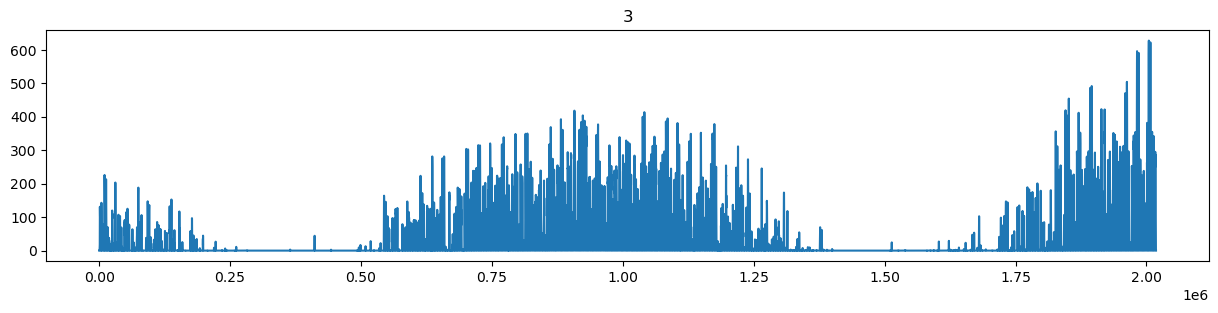

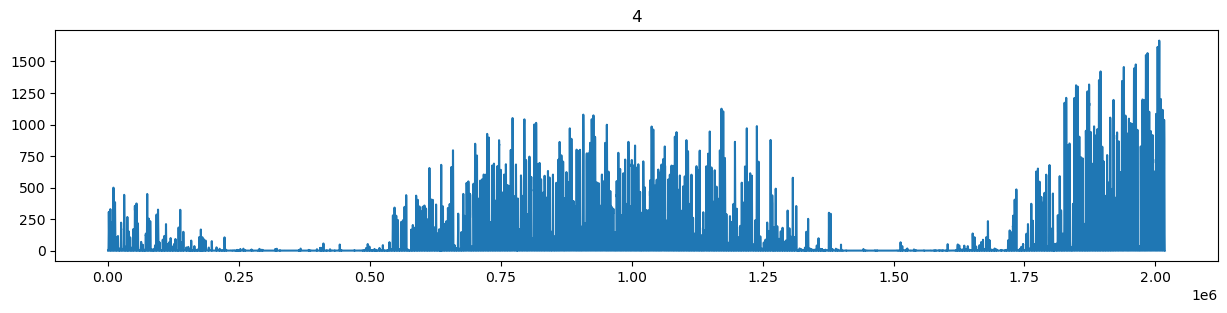

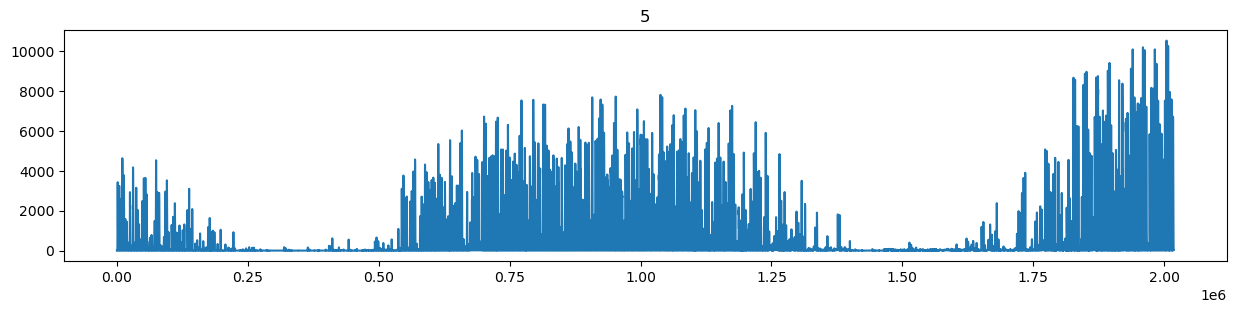

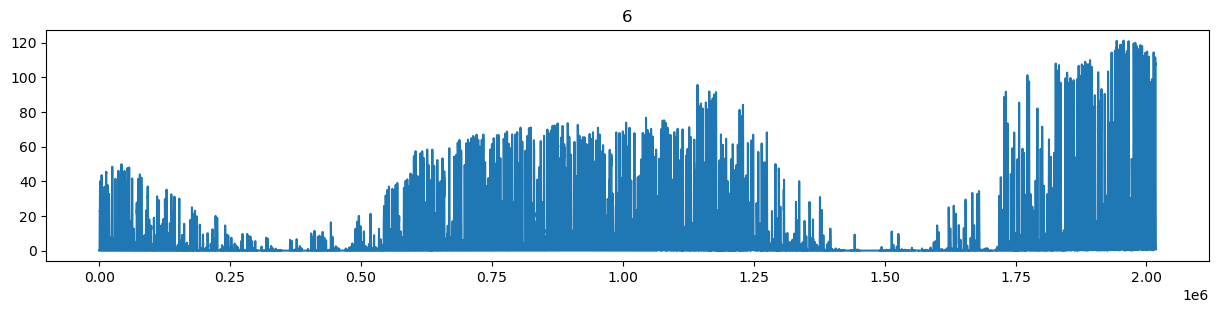

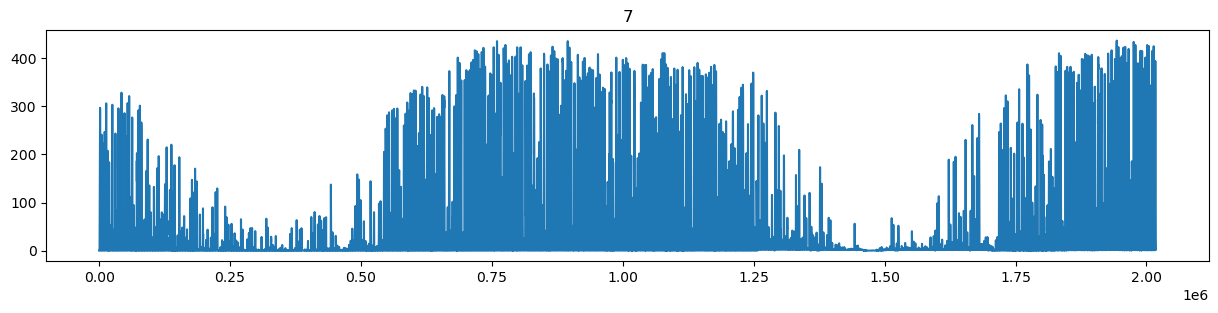

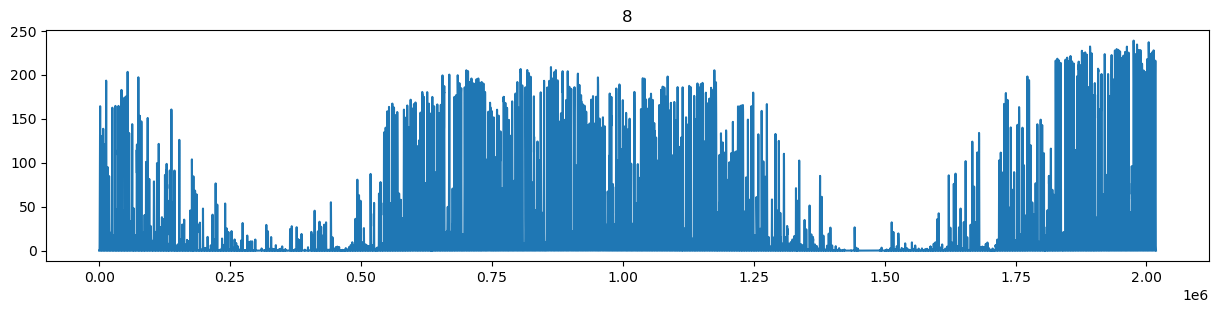

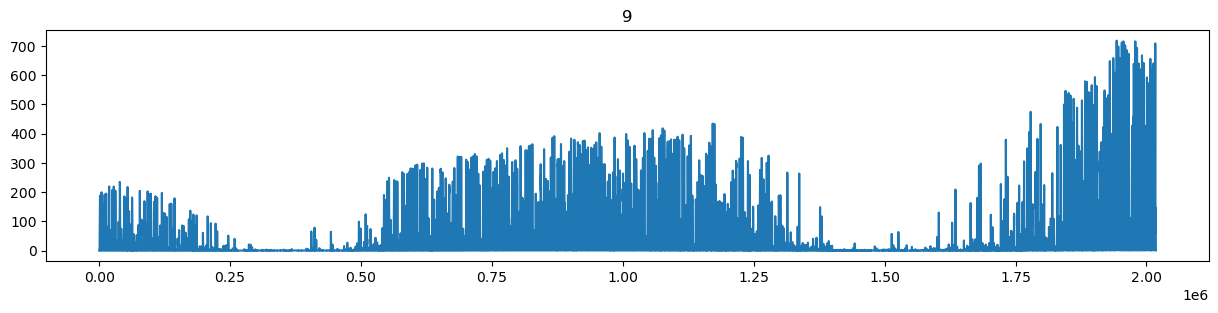

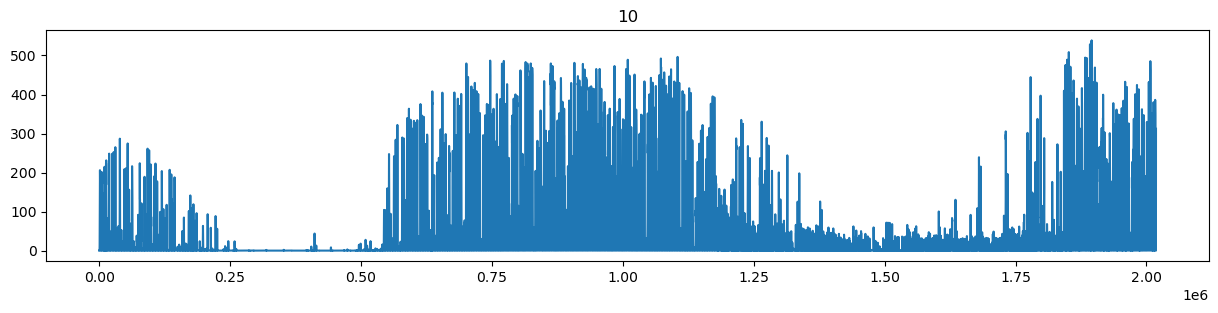

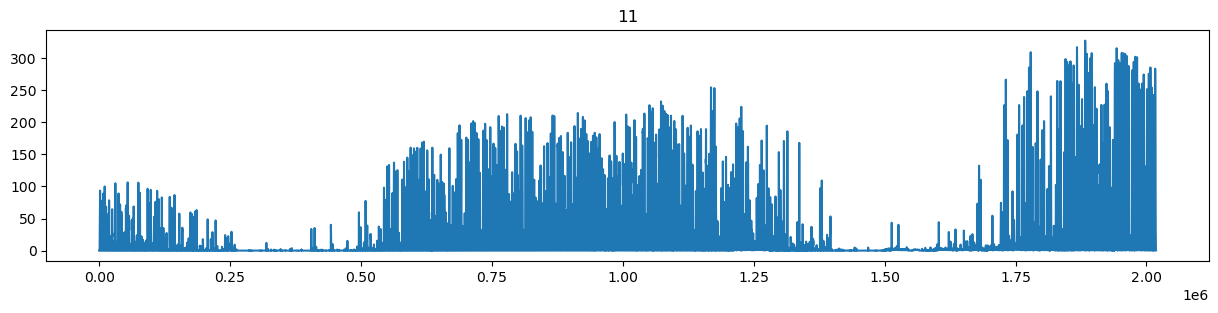

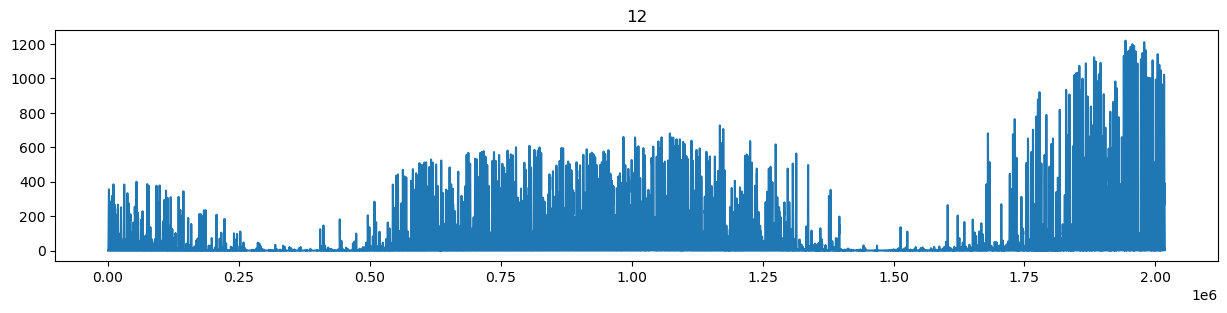

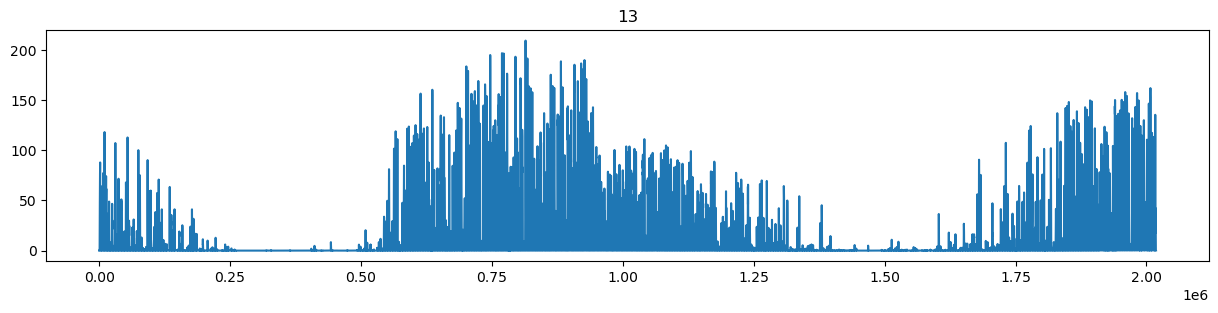

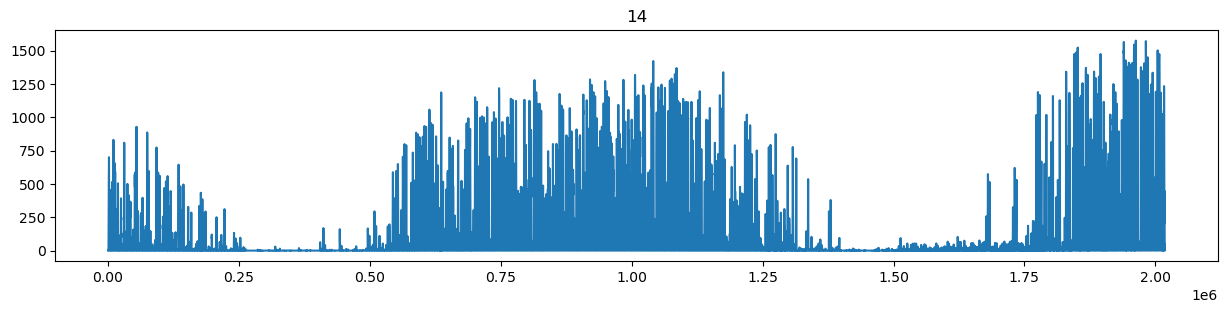

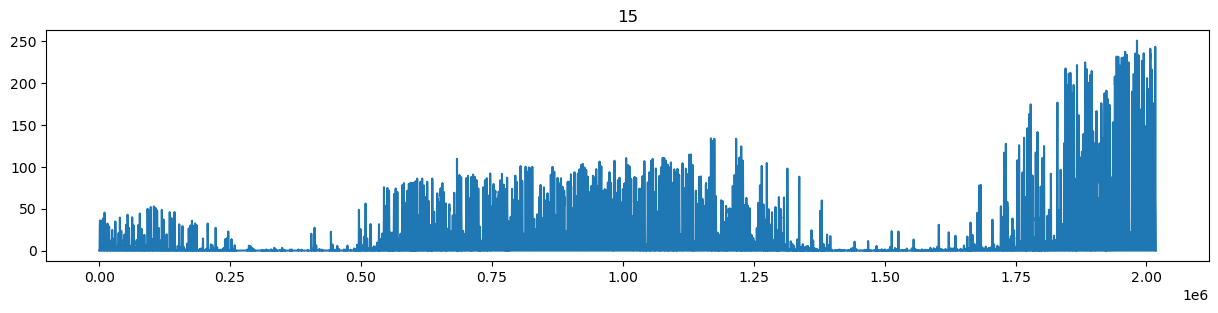

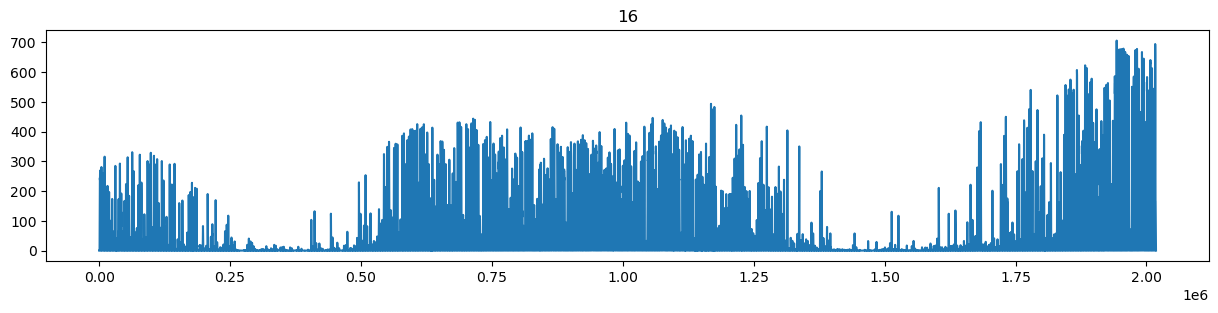

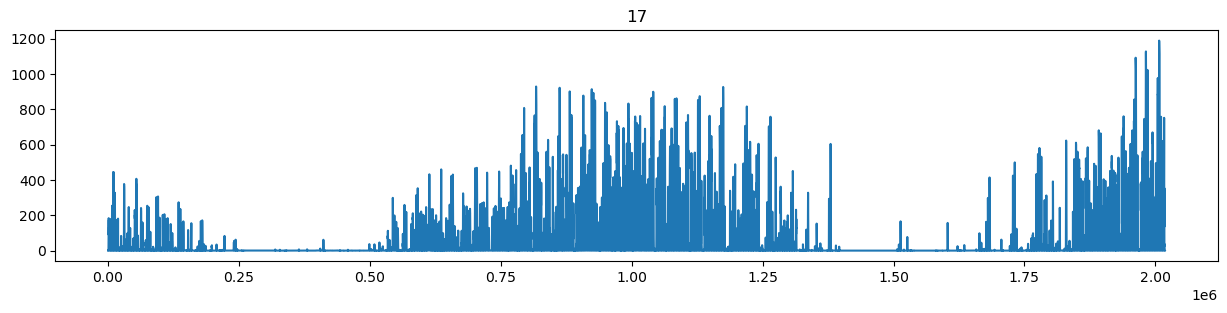

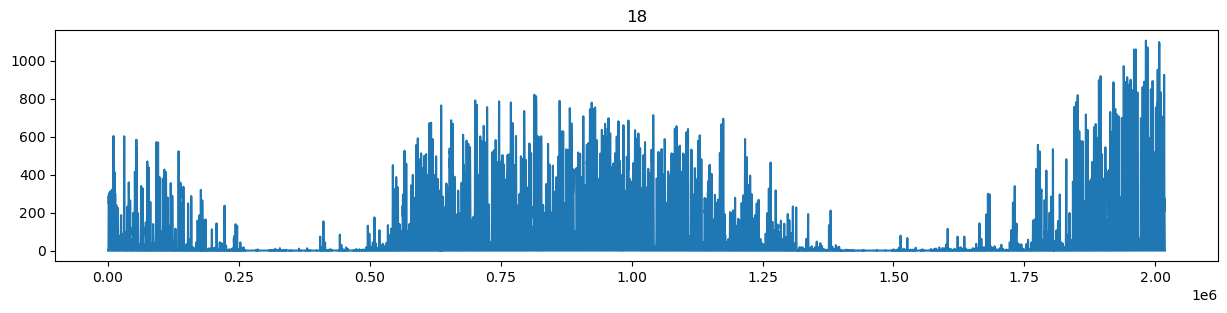

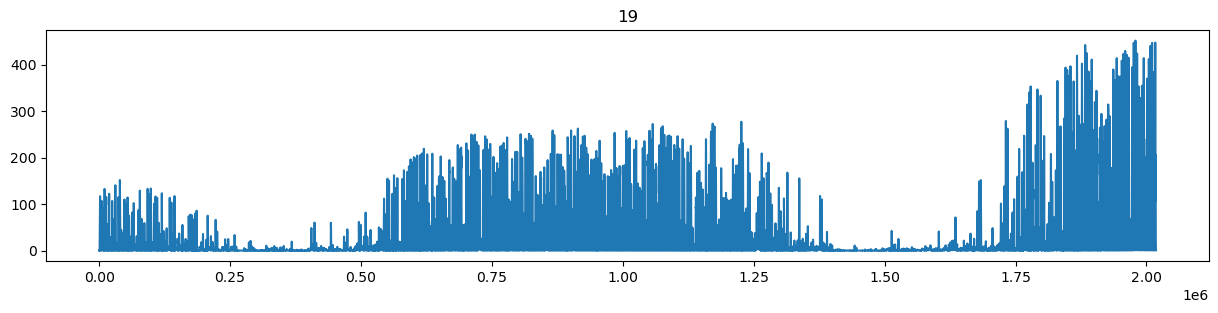

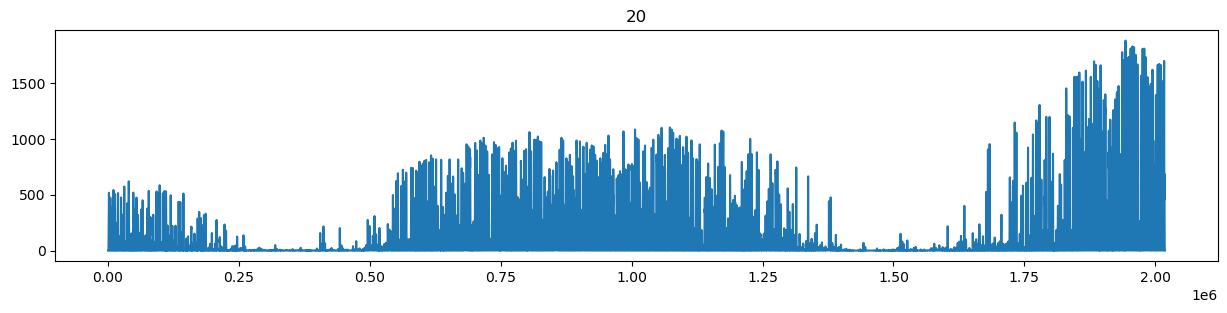

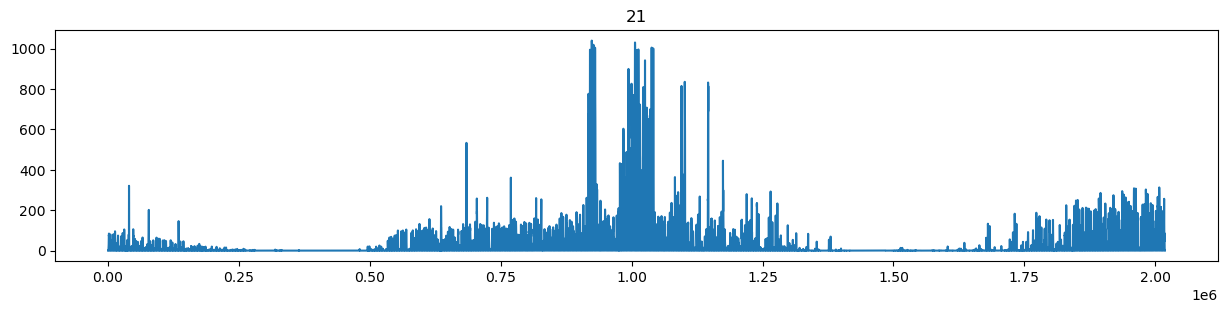

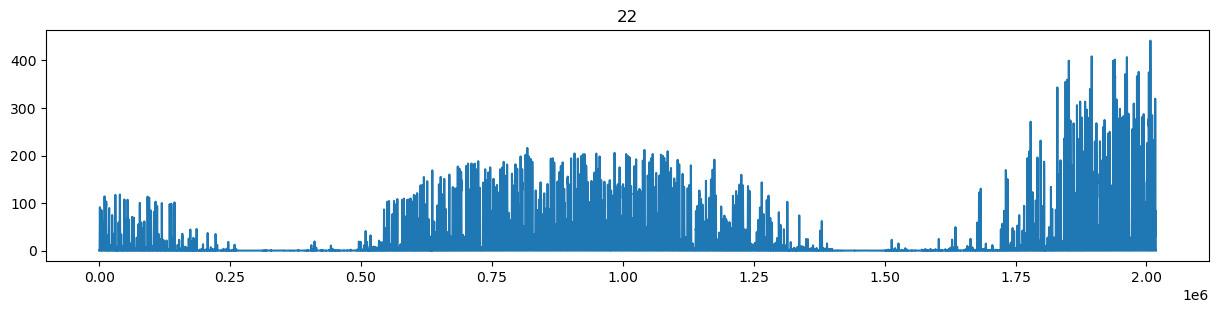

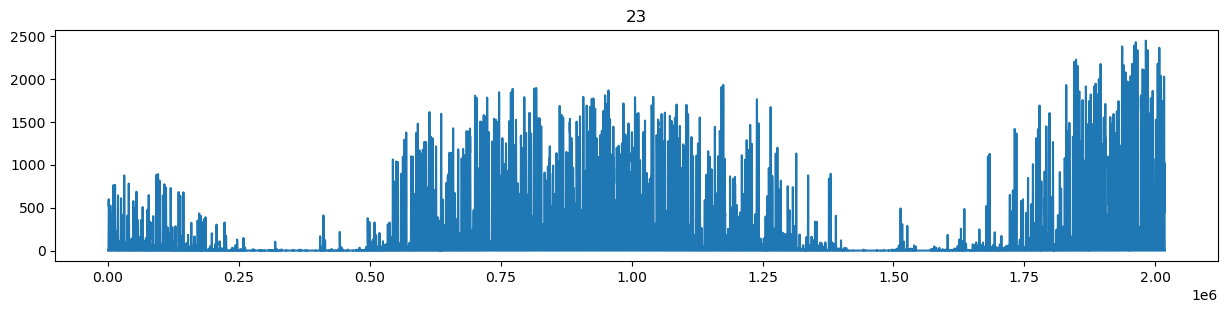

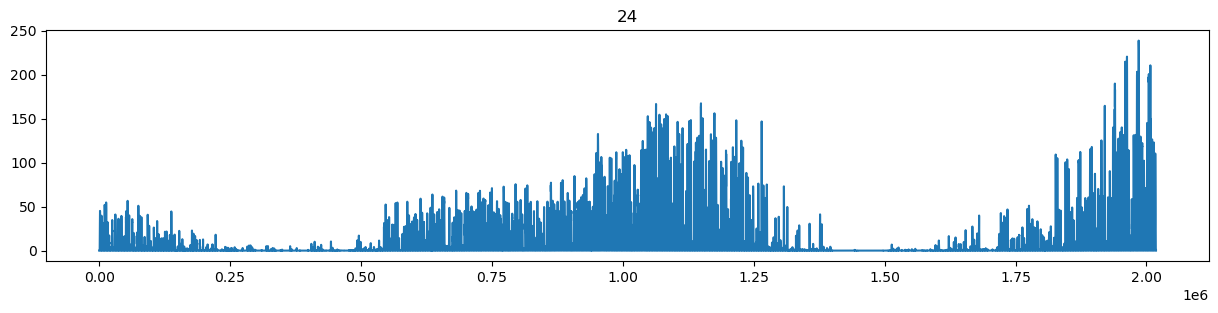

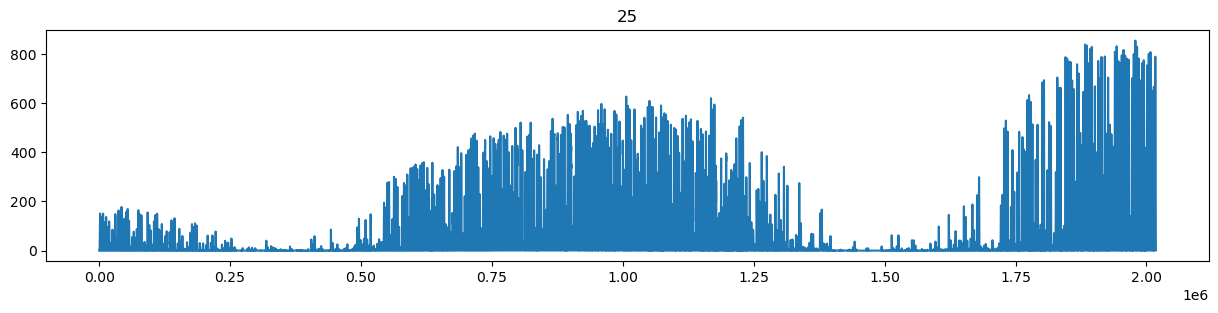

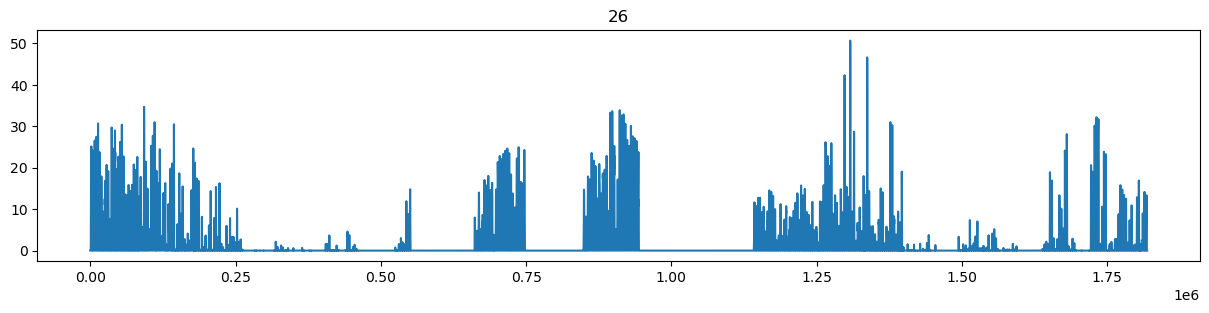

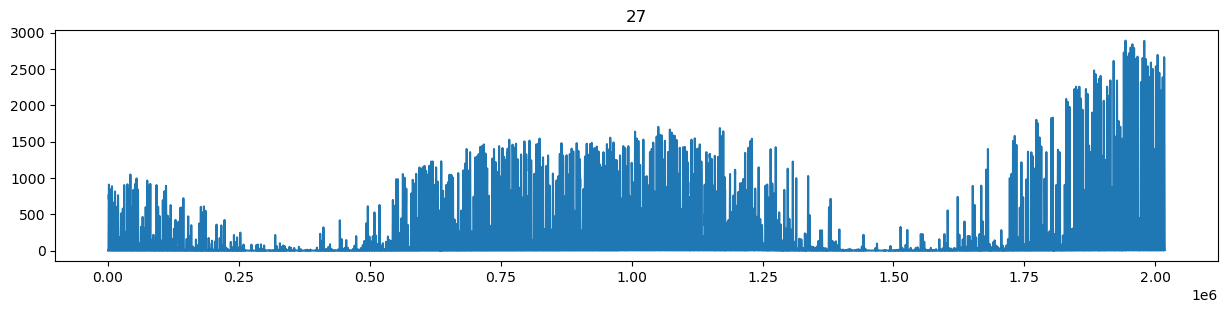

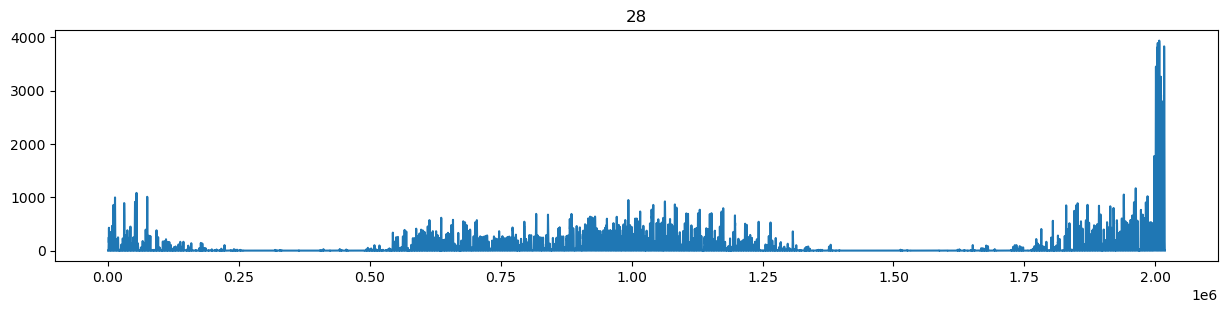

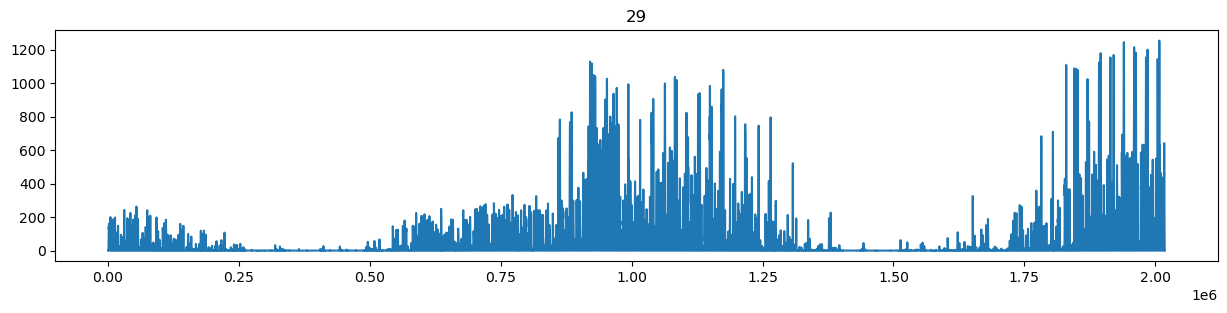

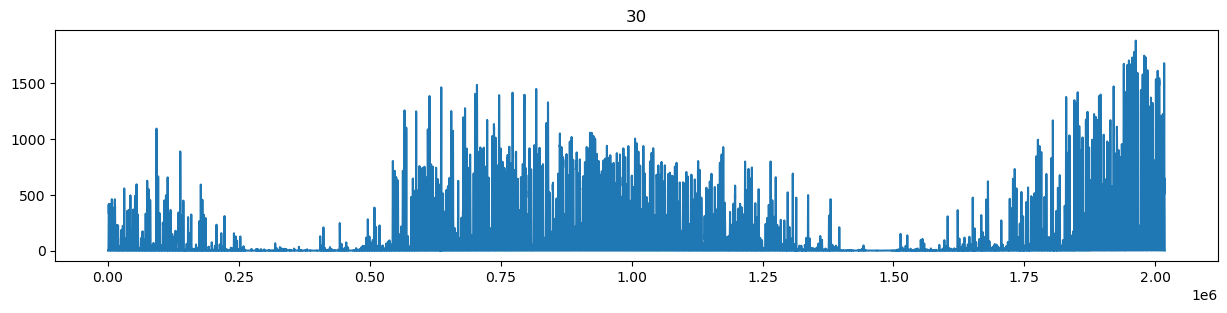

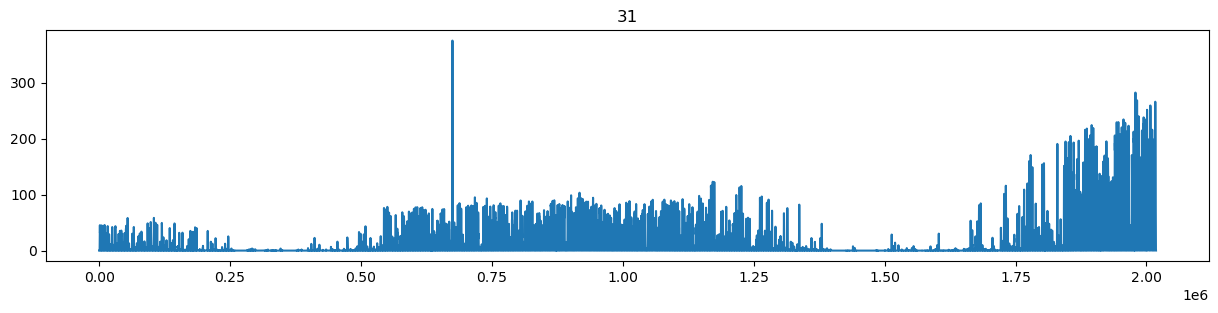

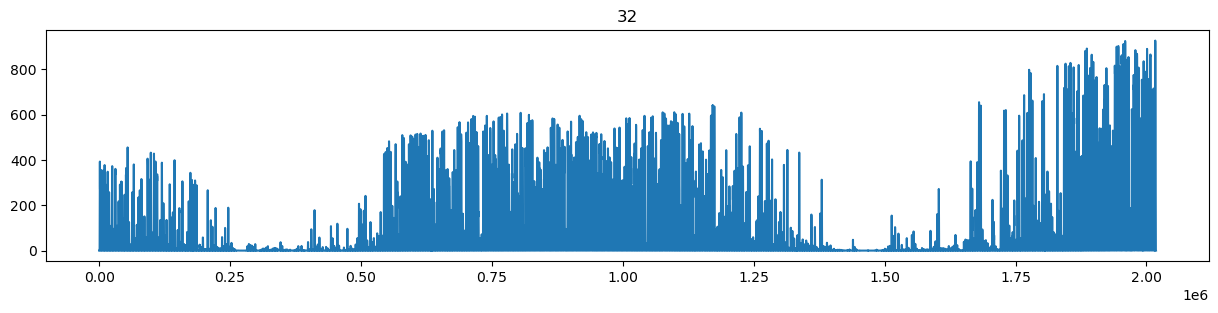

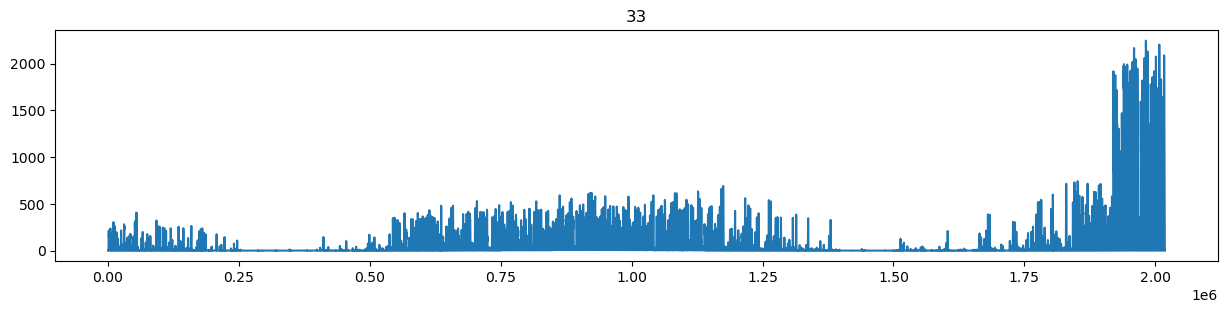

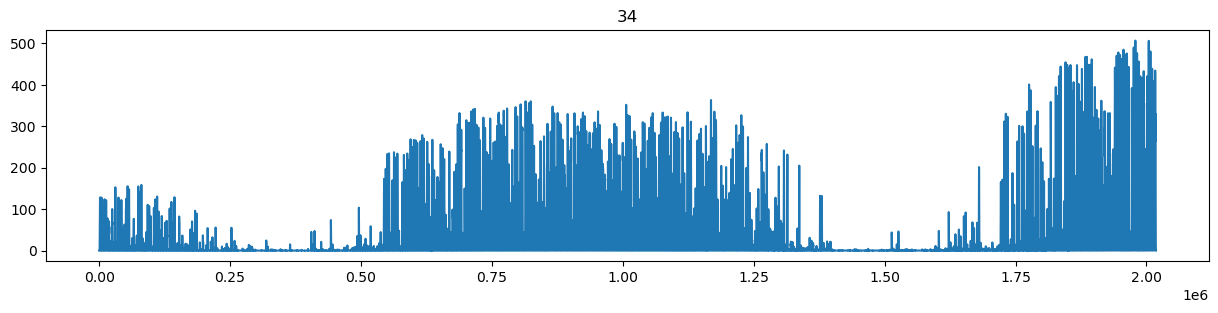

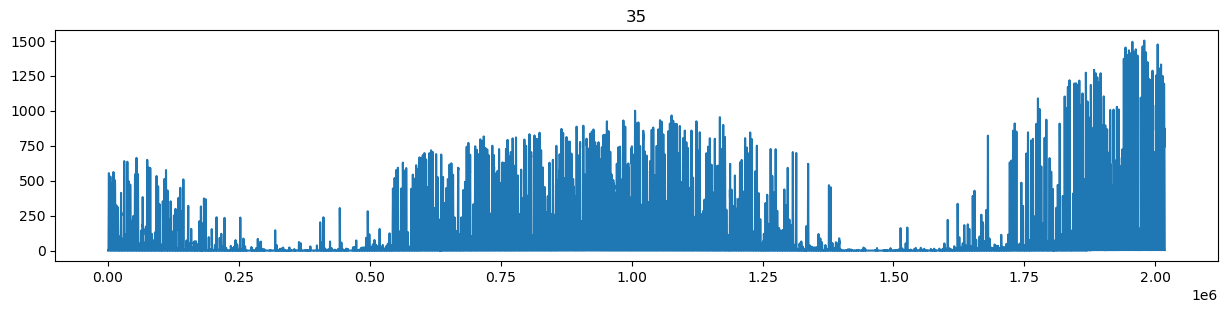

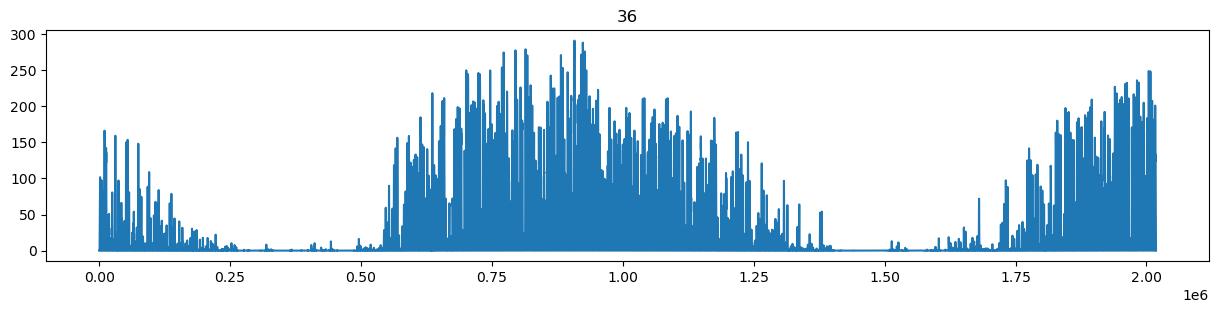

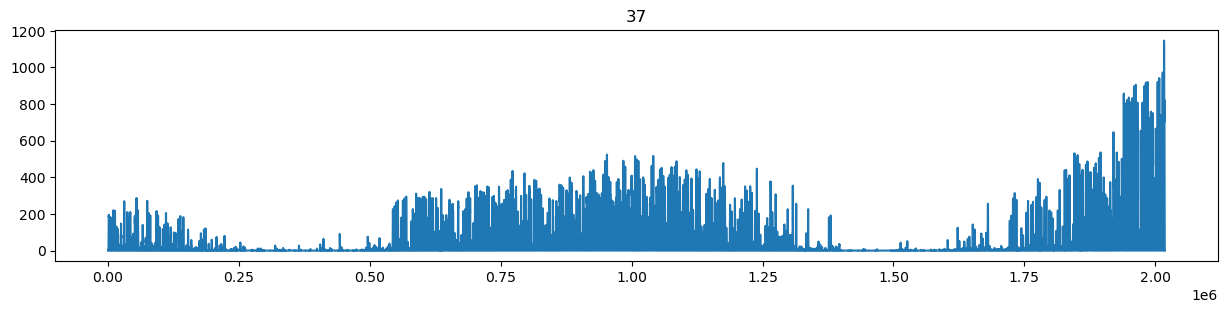

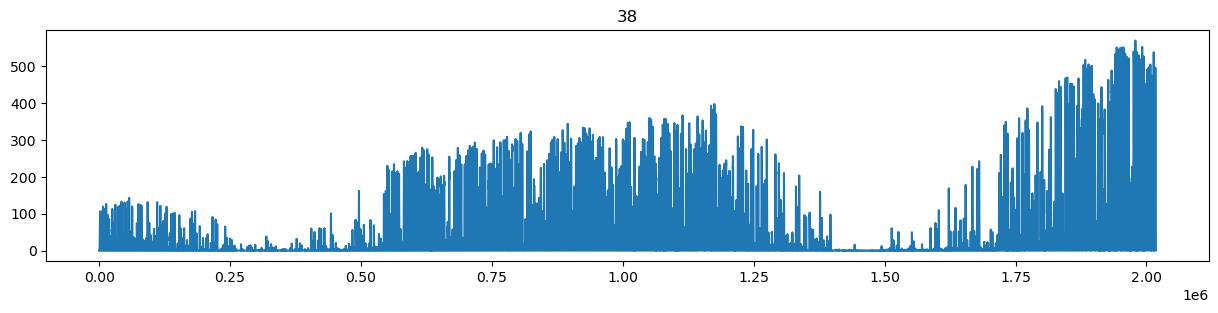

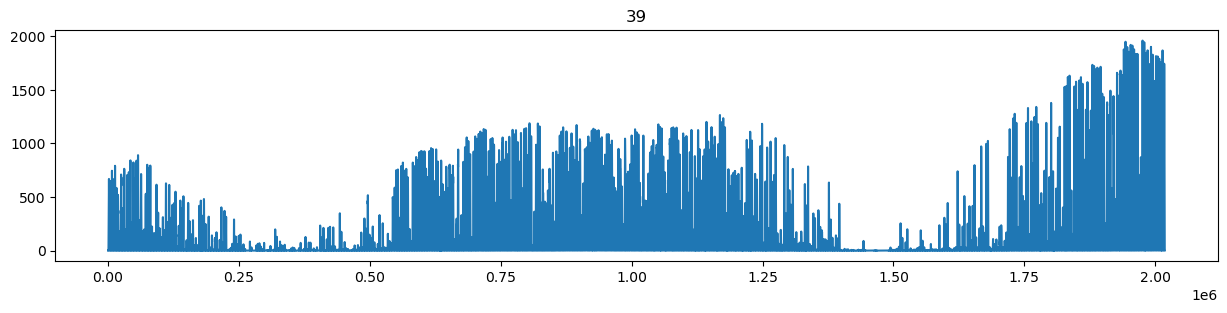

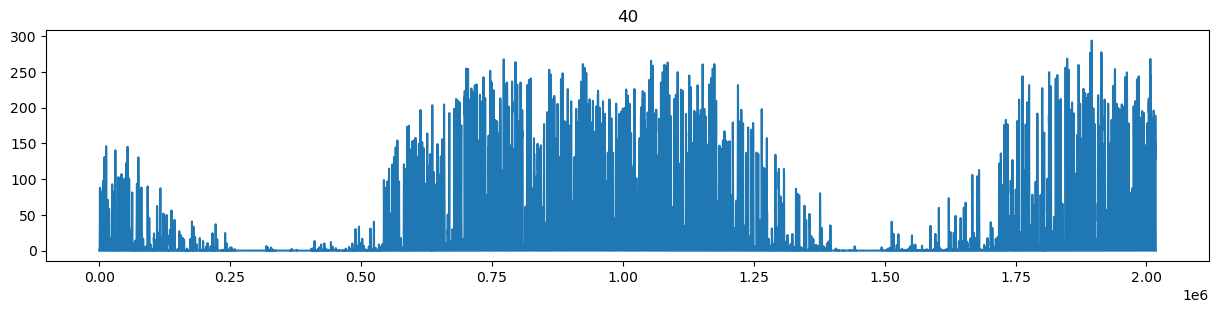

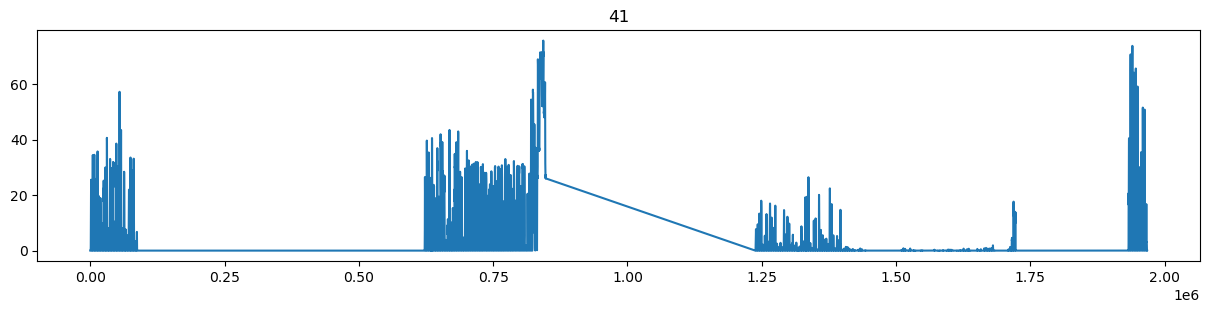

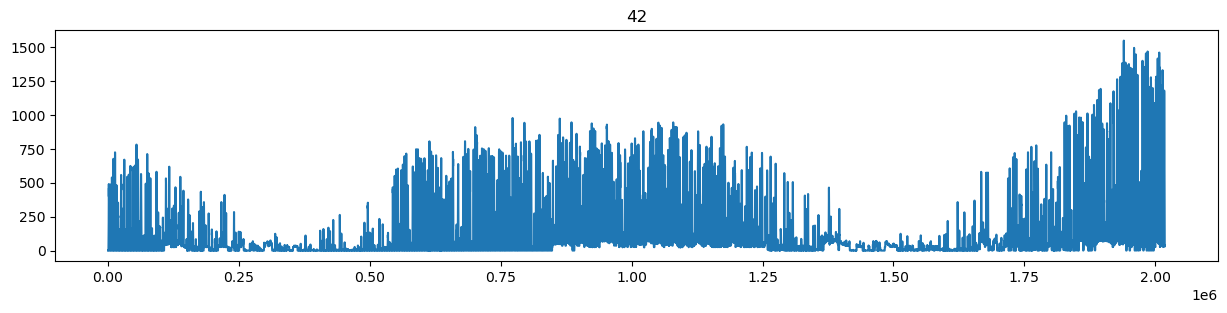

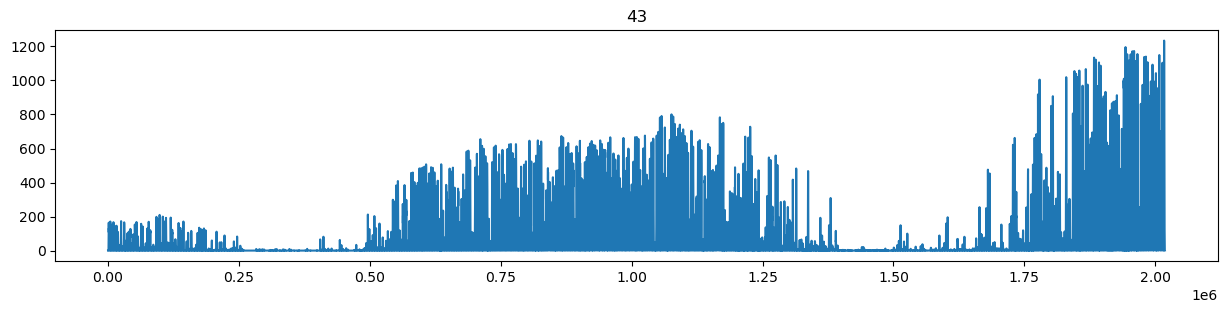

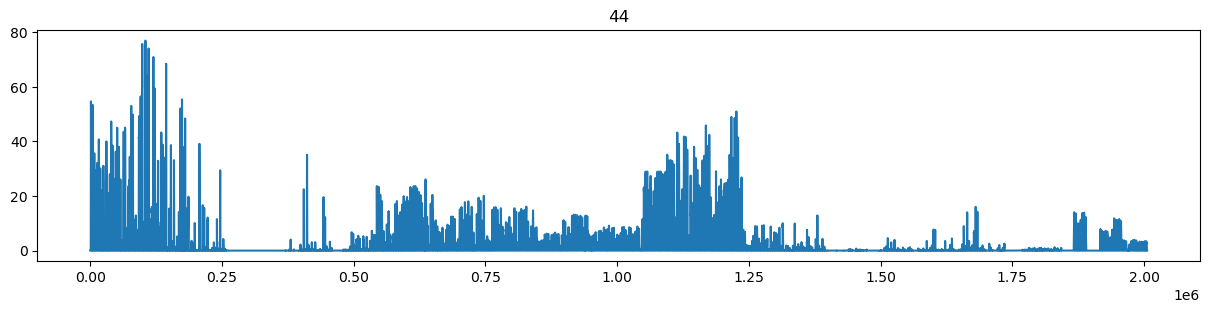

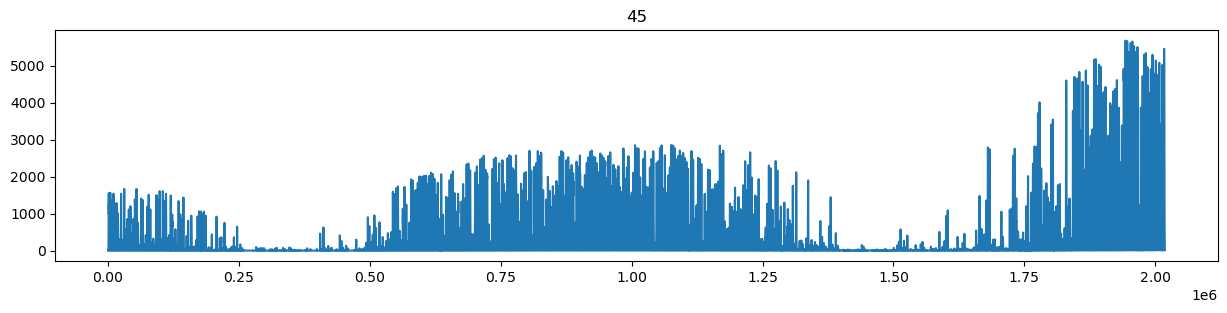

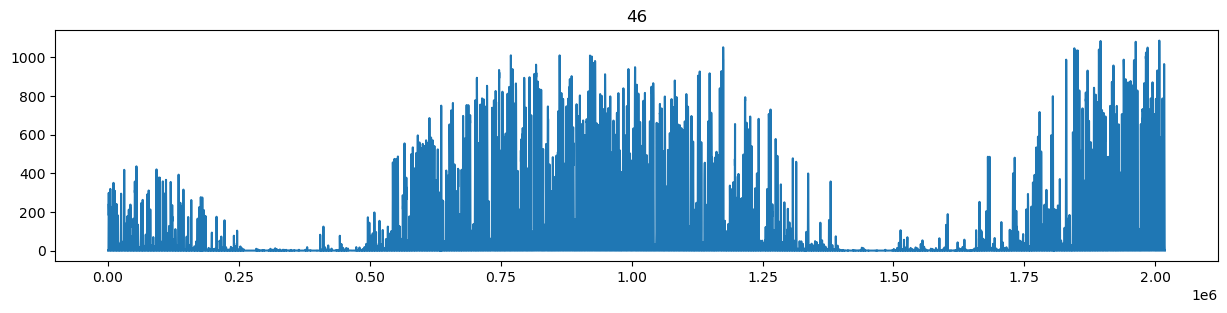

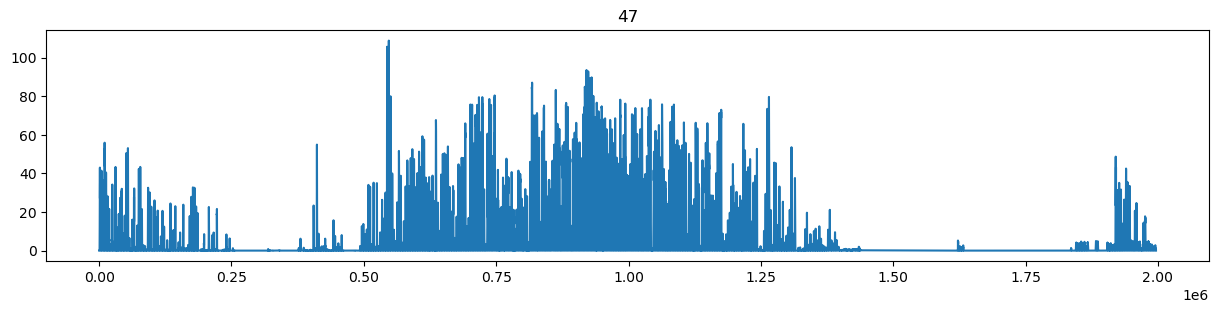

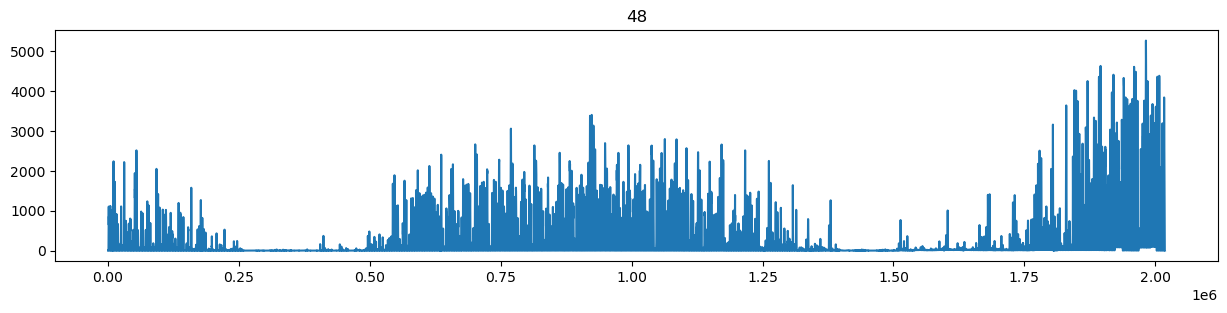

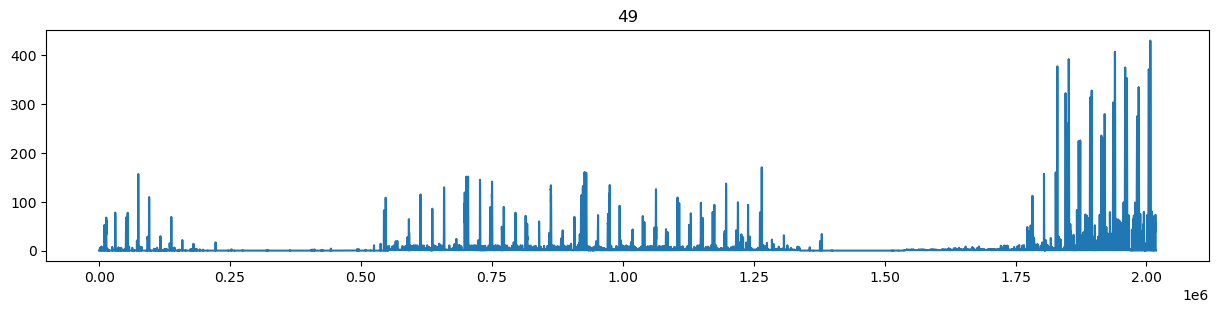

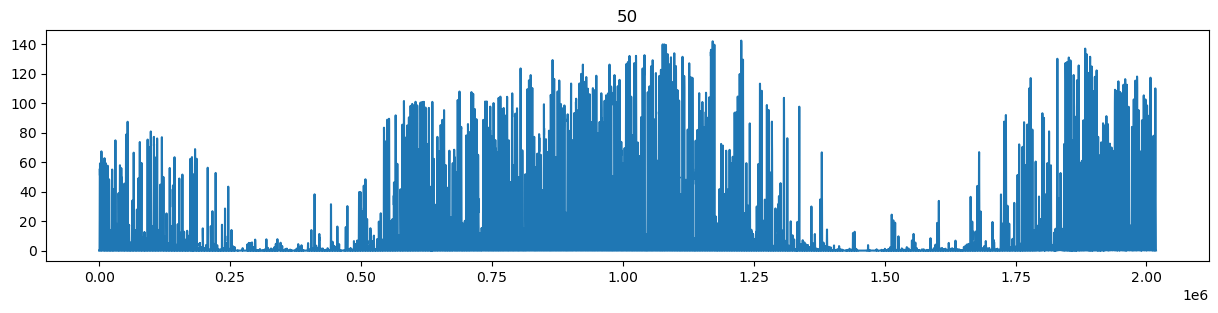

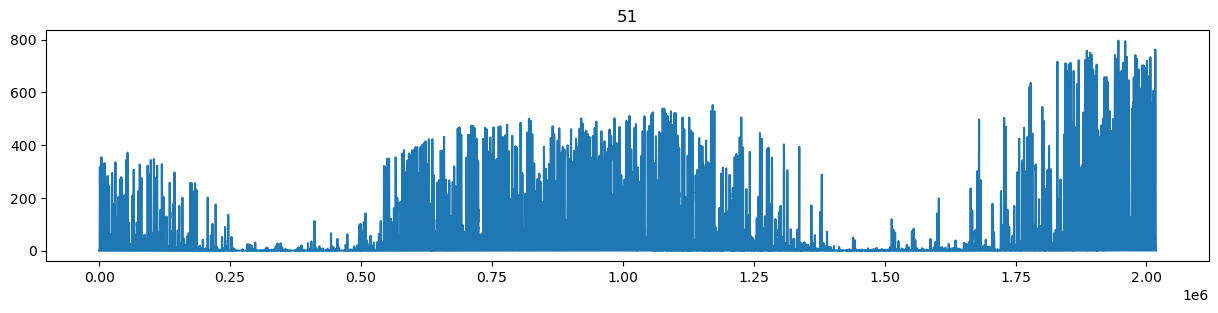

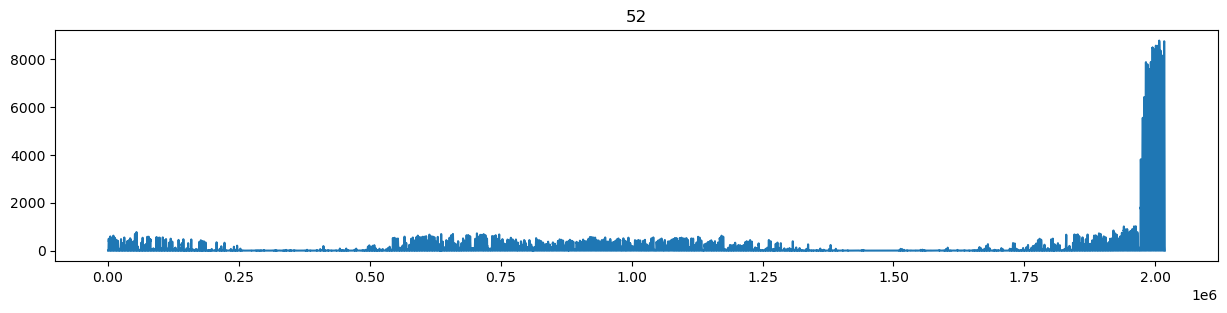

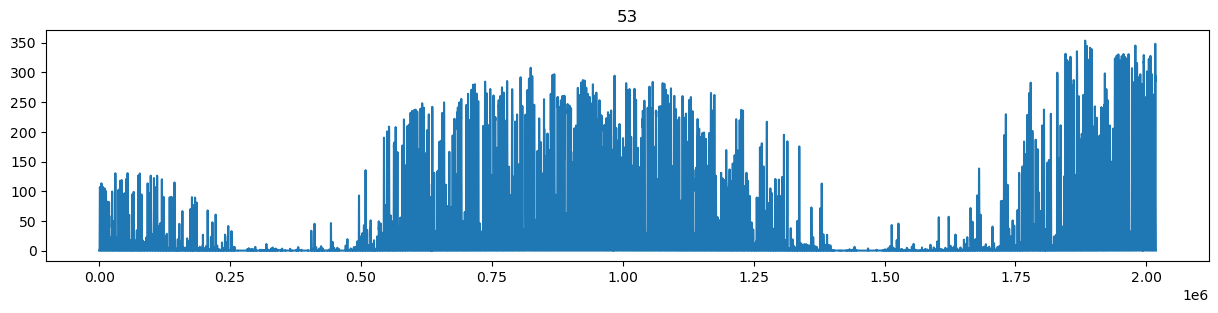

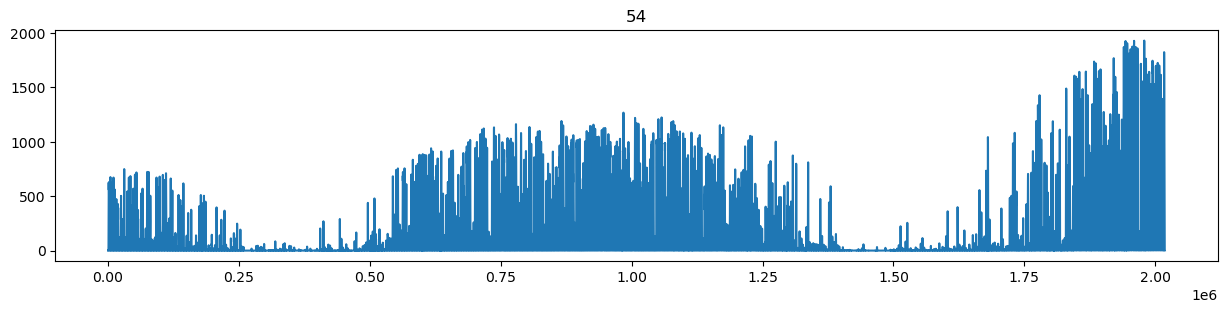

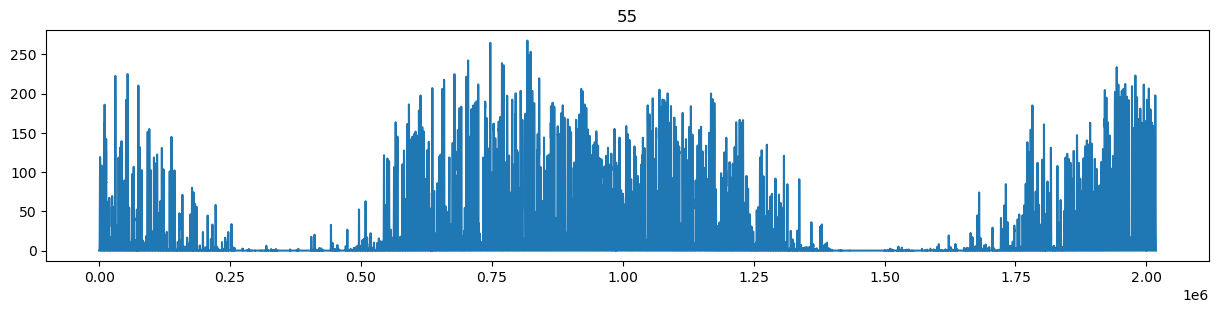

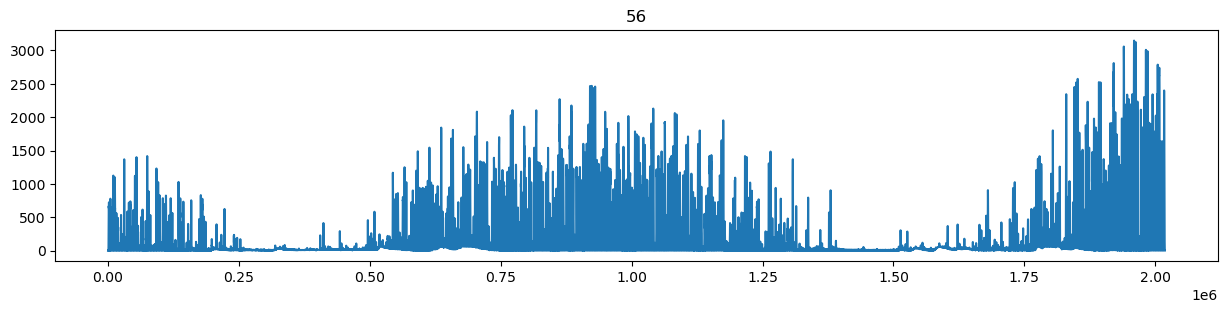

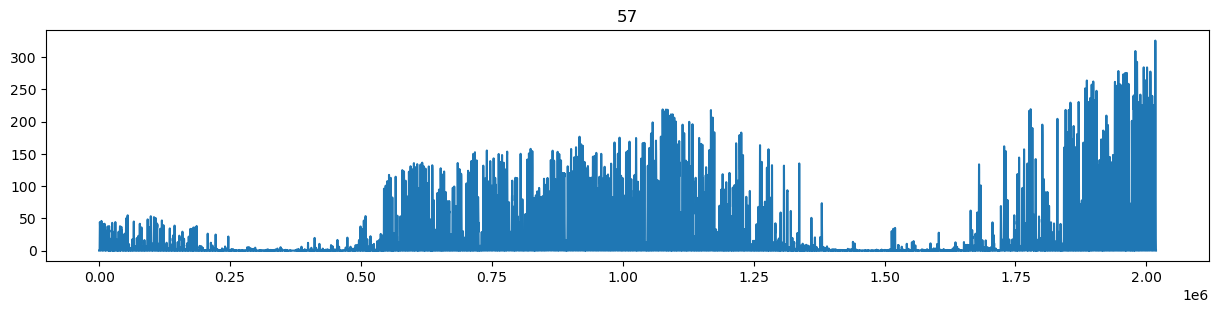

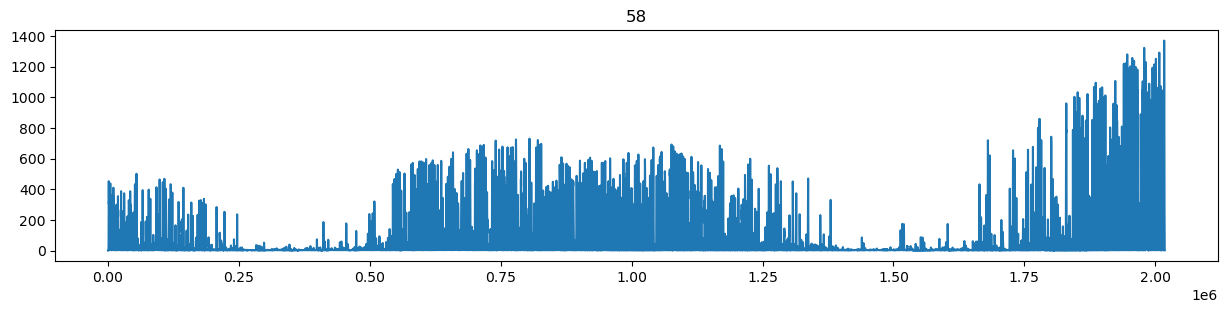

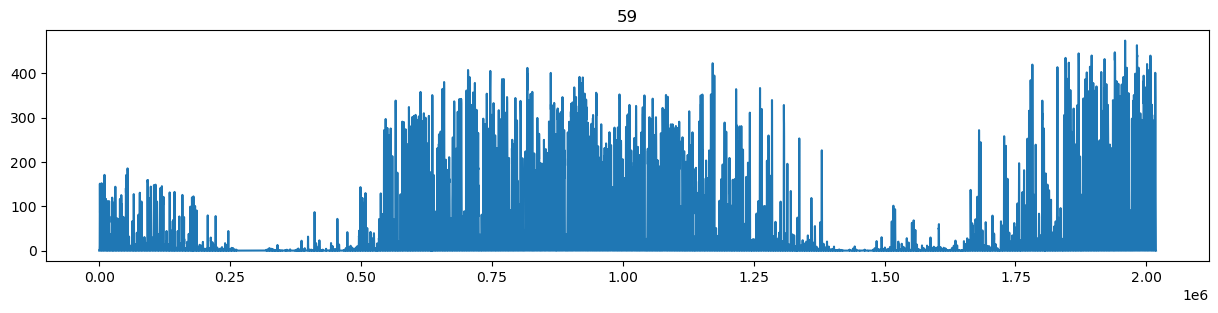

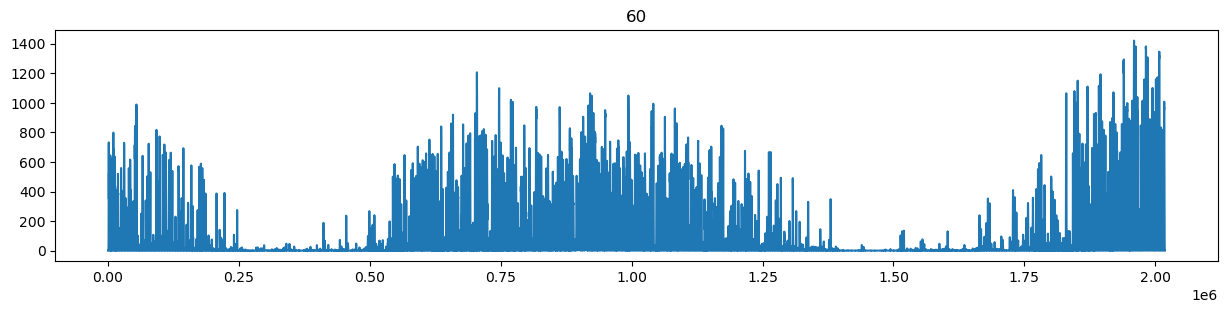

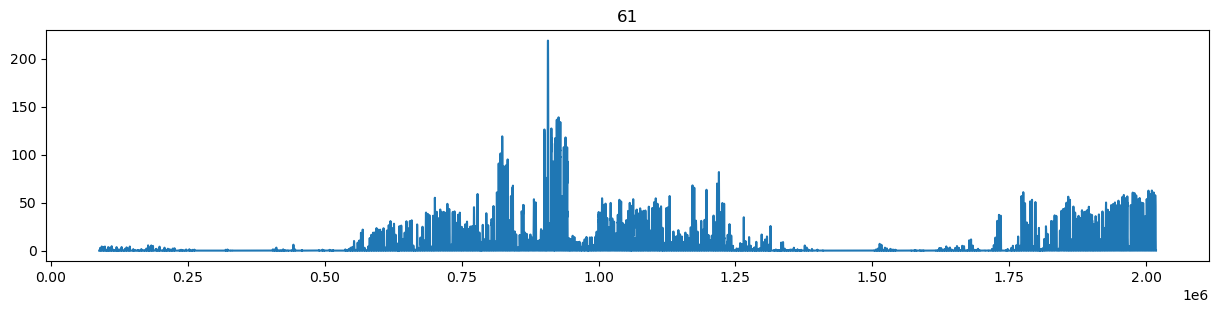

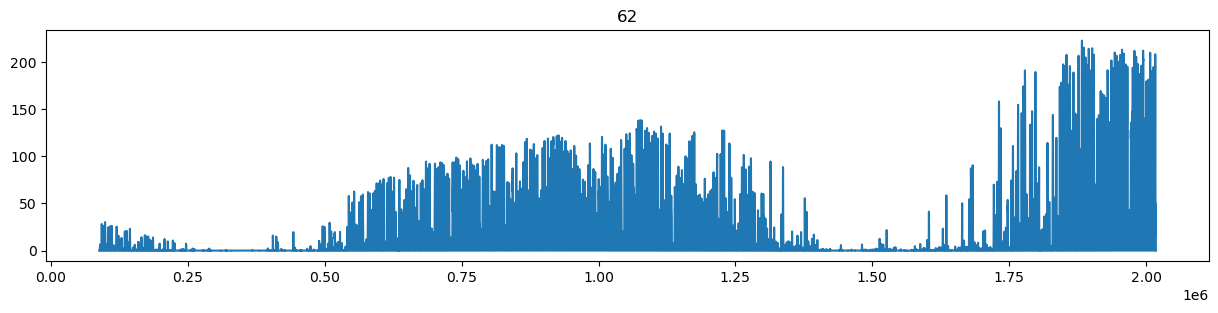

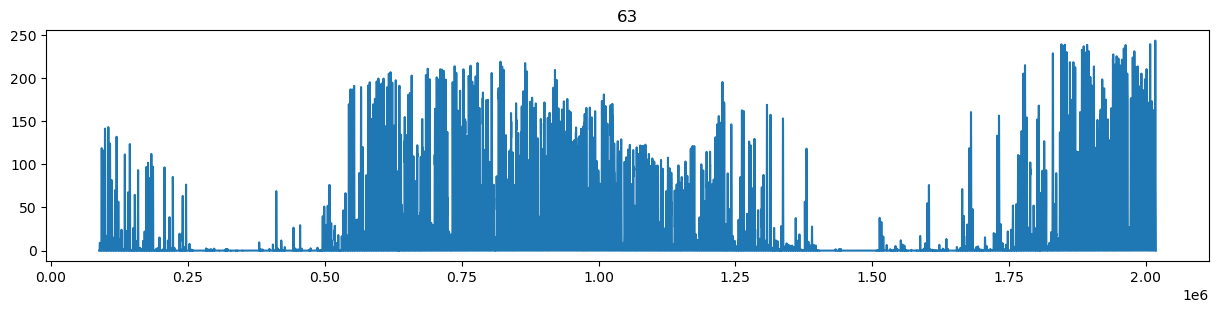

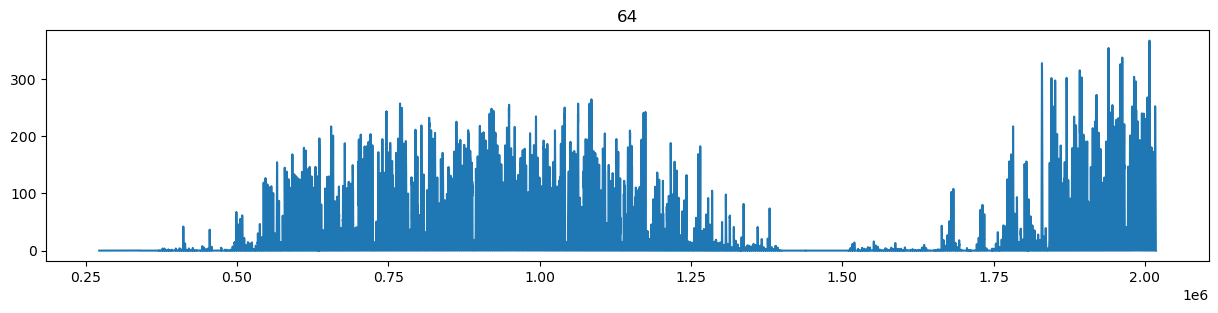

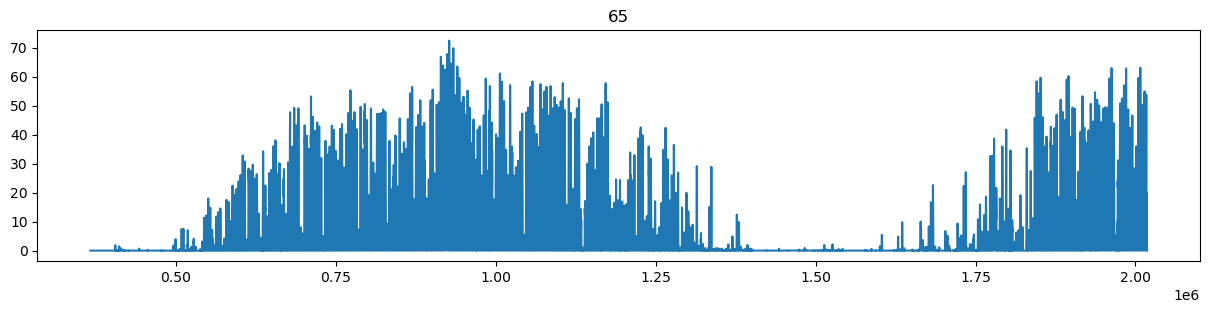

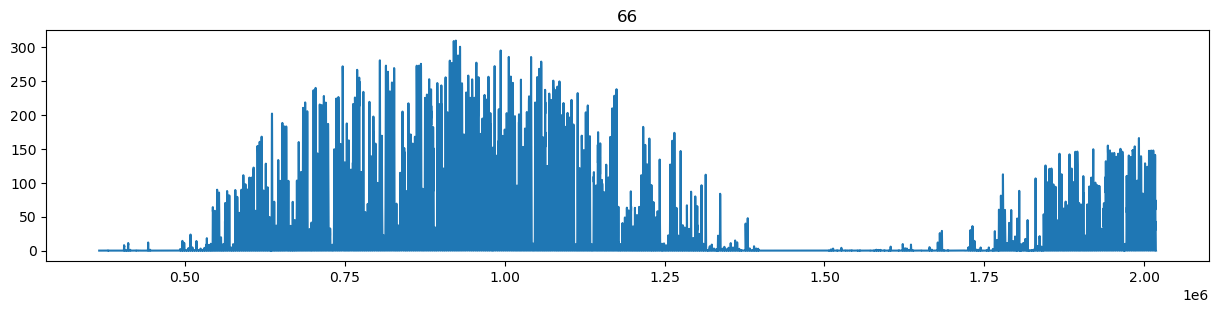

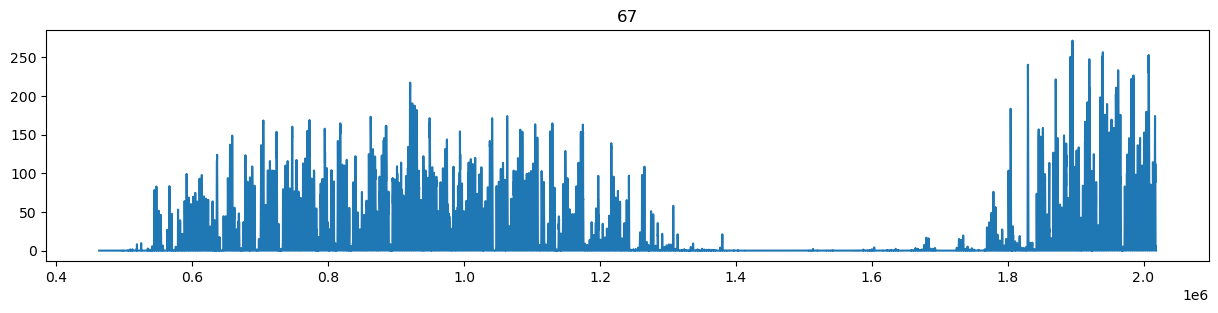

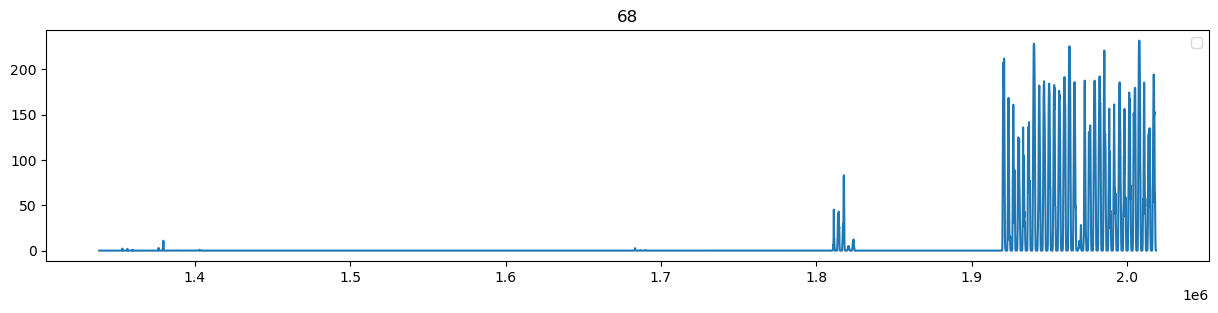

In [42]:
# prediction_unit_id별로 살펴보기
df_produce = df[df['is_consumption']==0]
for i in range(len(df['prediction_unit_id'].unique())):
    plt.figure(figsize=(15,3))
    plt.plot(df_produce[df_produce['prediction_unit_id']==i]['target'])
    plt.title(i)
plt.legend()

### 에너지 소비량

In [43]:
# 총소비량
production = df[df['is_consumption']==1]
total = production.groupby('datetime')['target'].sum()
total

datetime
2021-09-01 00:00:00    19859.808
2021-09-01 01:00:00    19265.078
2021-09-01 02:00:00    19260.892
2021-09-01 03:00:00    19026.484
2021-09-01 04:00:00    19367.124
                         ...    
2023-05-31 19:00:00    28058.709
2023-05-31 20:00:00    30832.105
2023-05-31 21:00:00    32601.387
2023-05-31 22:00:00    32070.928
2023-05-31 23:00:00    29070.312
Name: target, Length: 15312, dtype: float64

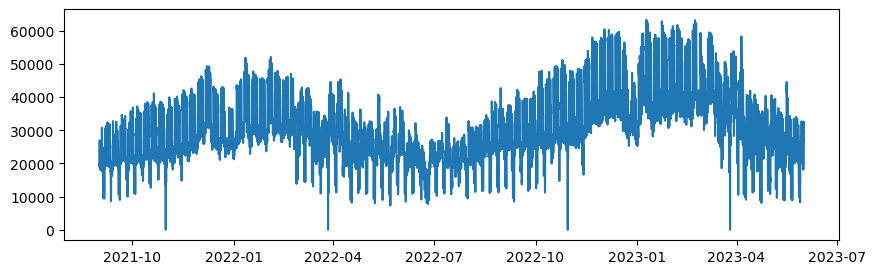

In [44]:
plt.figure(figsize=(10,3))
plt.plot(total)

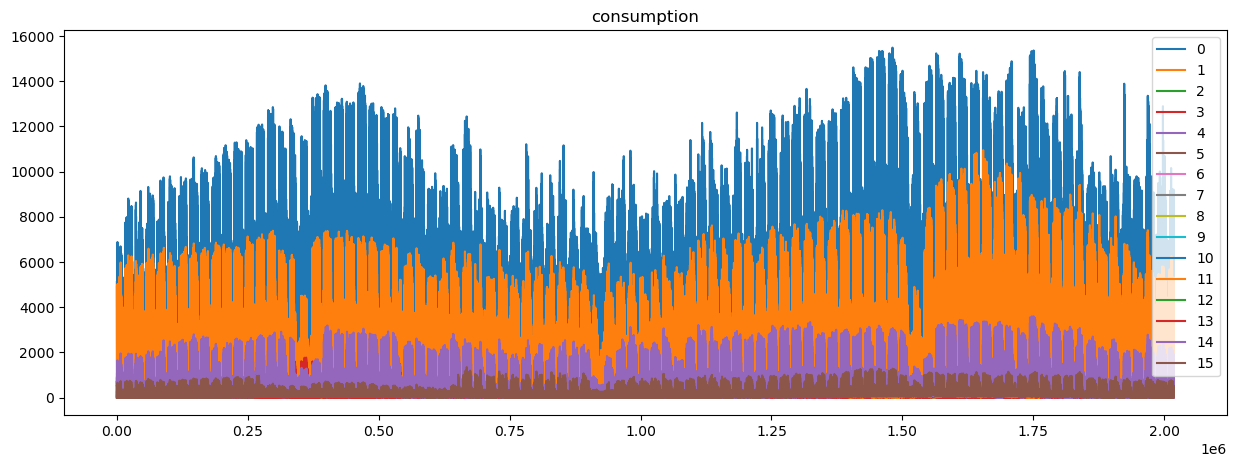

In [45]:
# county별 소비량 비교
df_consumption = df[df['is_consumption']==1]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.plot(df_consumption[df_consumption['county']==i]['target'], label=i)
plt.title('consumption')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


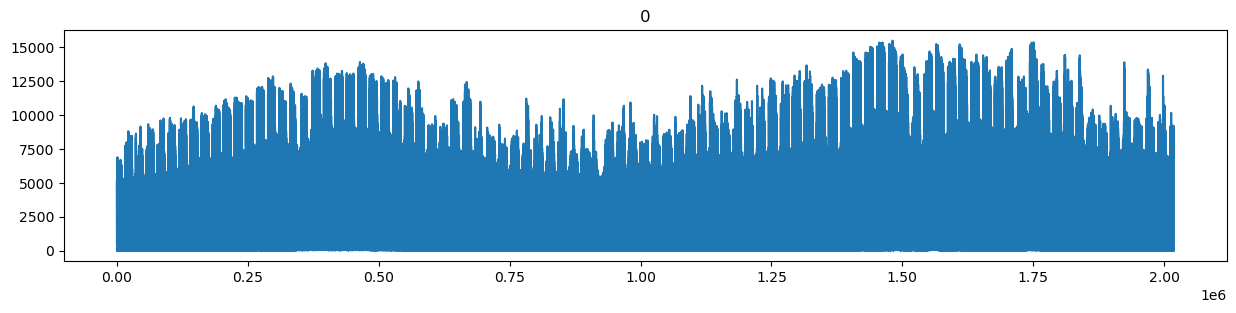

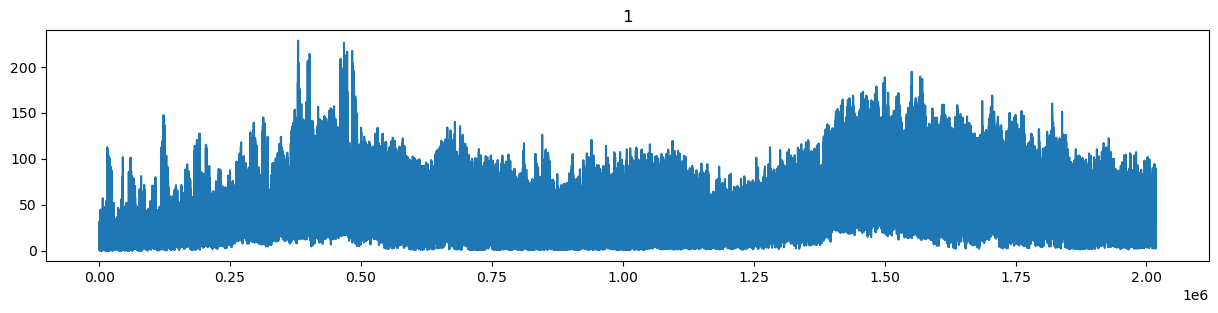

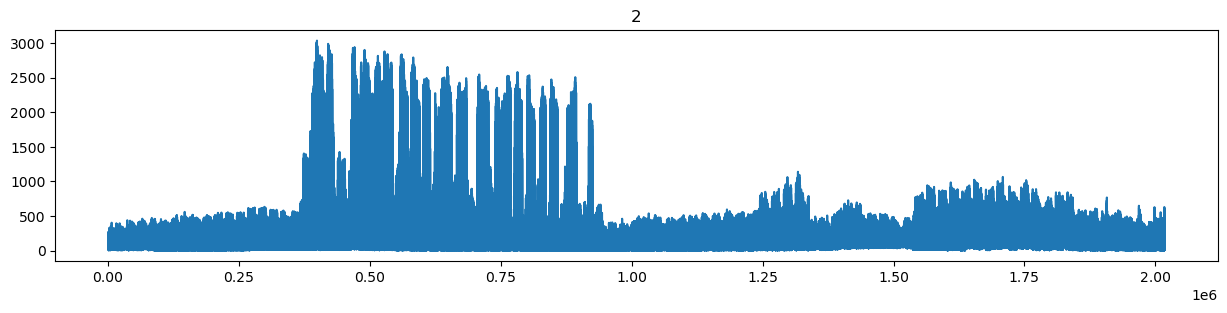

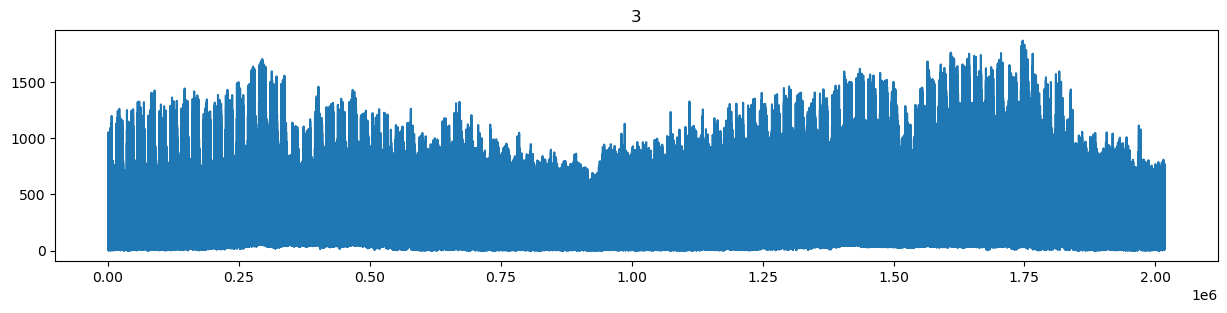

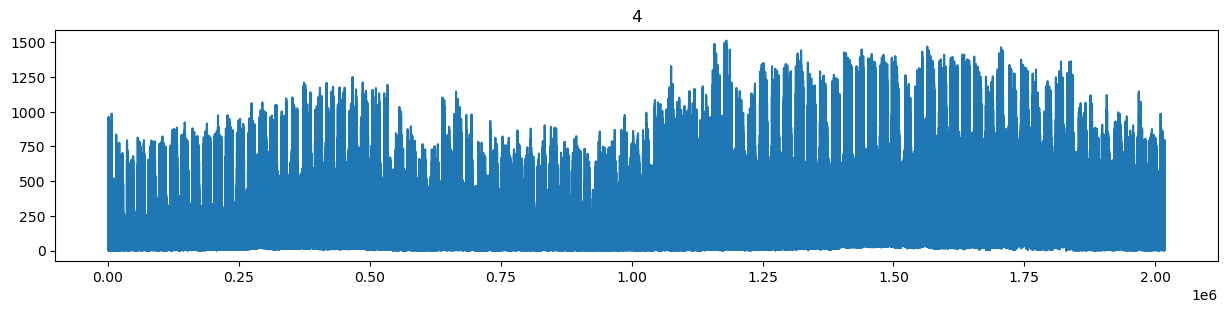

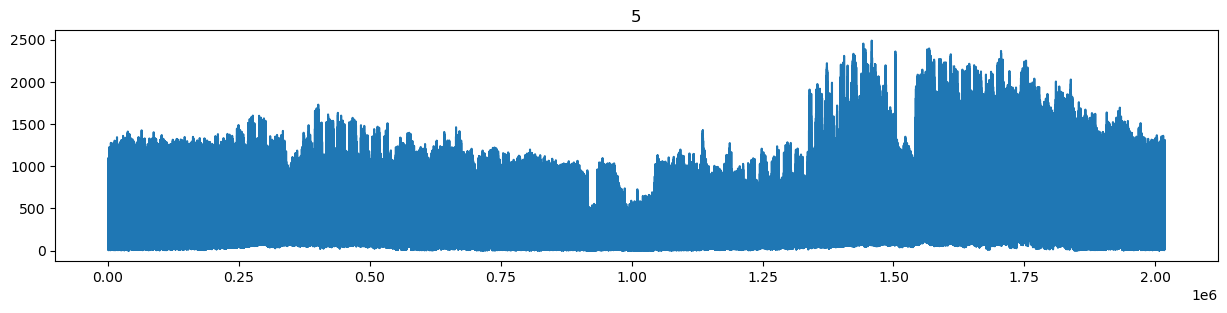

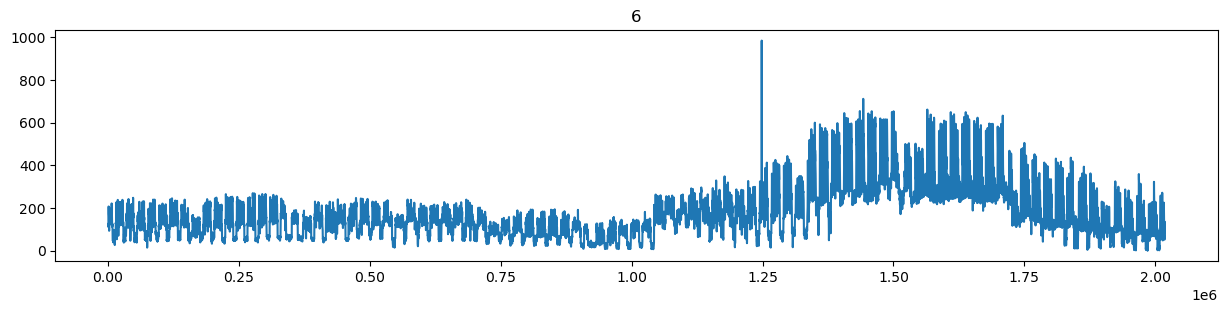

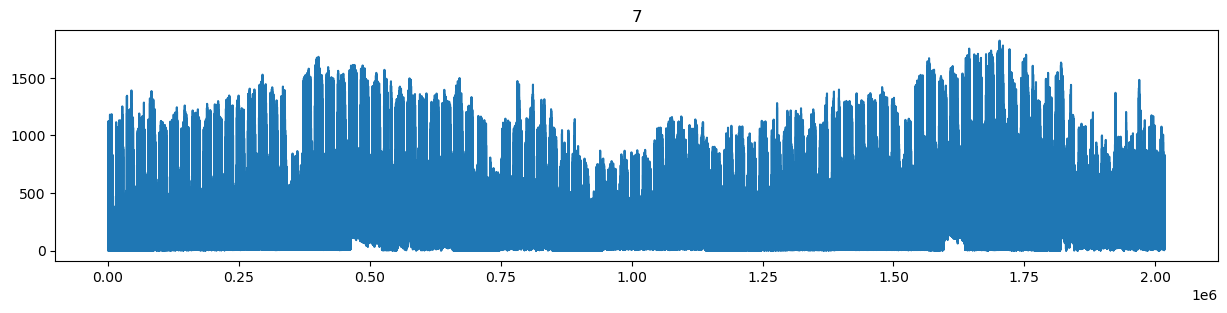

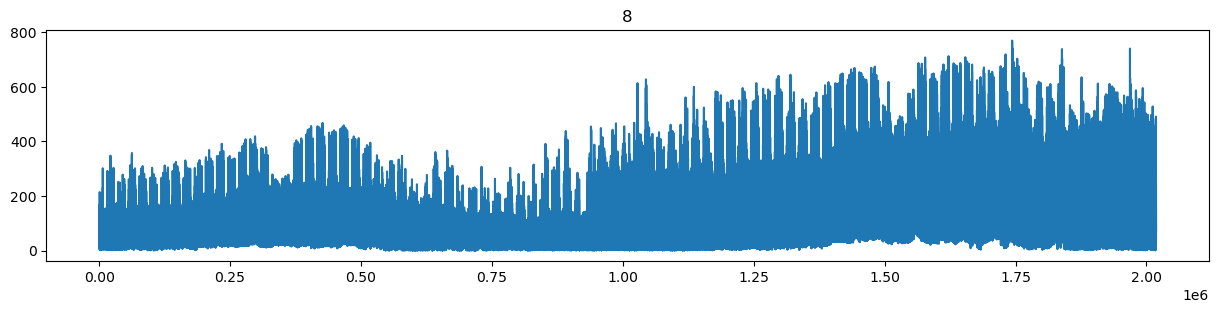

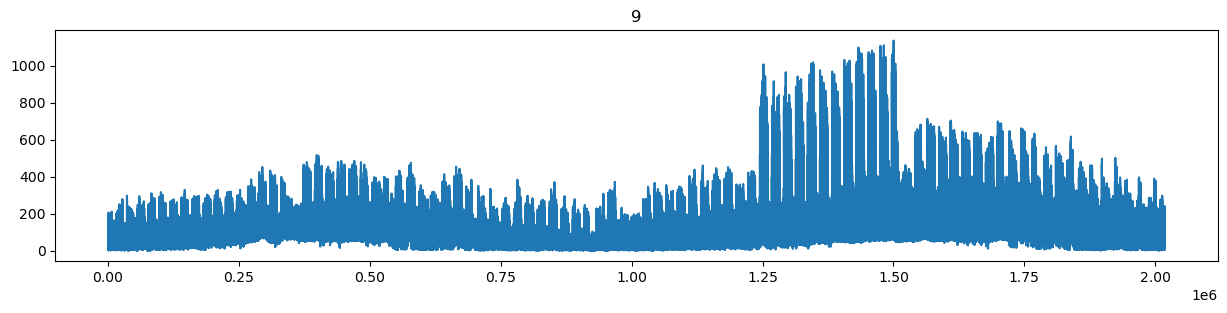

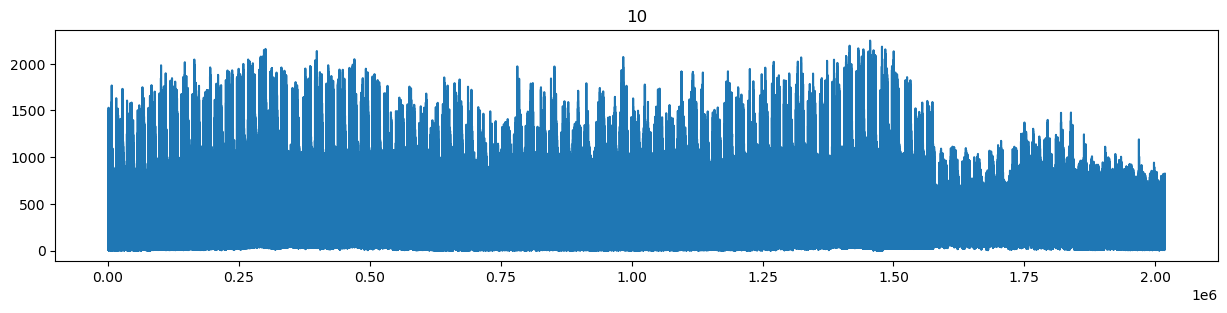

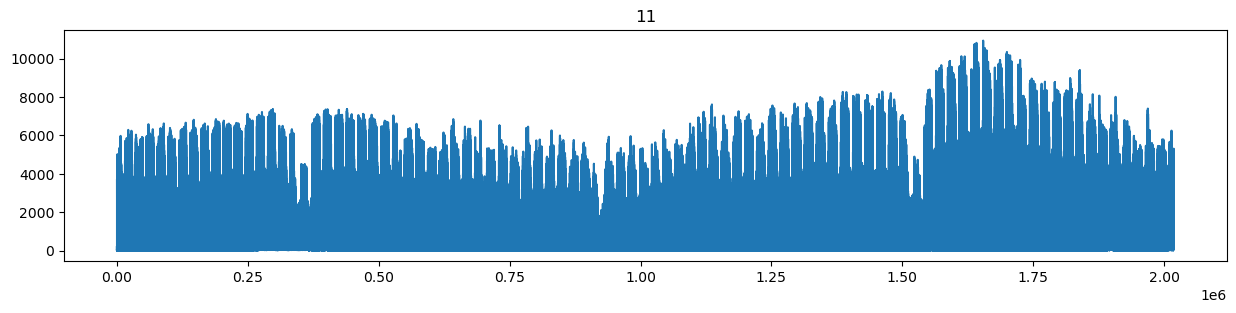

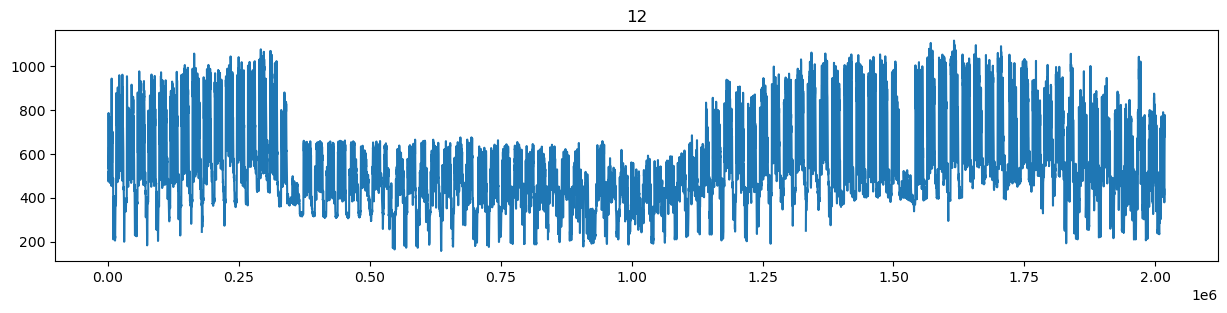

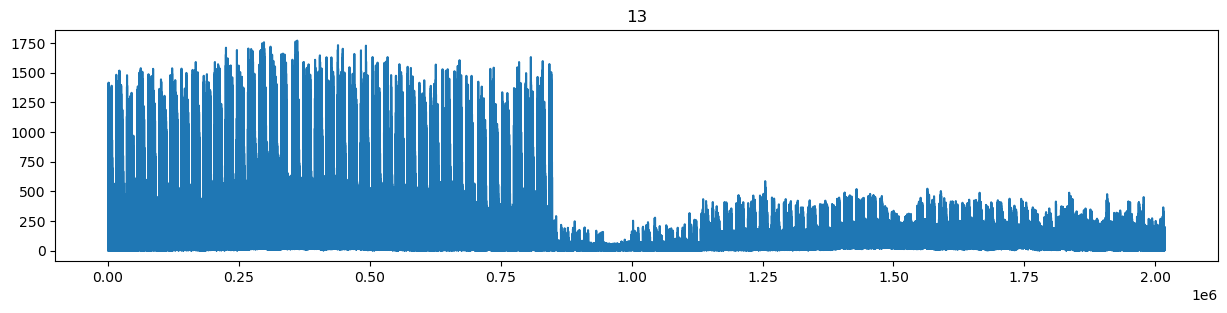

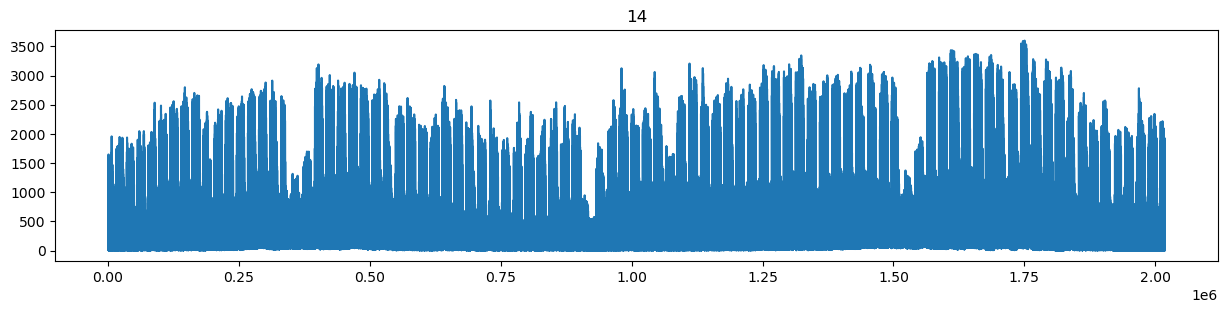

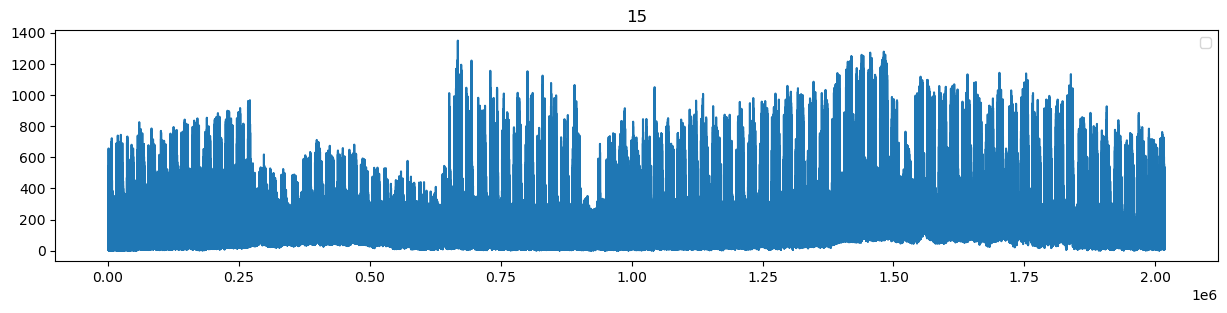

In [46]:
# county별로 살펴보기
df_consumption = df[df['is_consumption']==1]
for i in range(len(df['county'].unique())):
    plt.figure(figsize=(15,3))
    plt.plot(df_consumption[df_consumption['county']==i]['target'])
    plt.title(i)
plt.legend()

- 이상치
    - county 6에서 2022년 10월

In [47]:
# target값이 0인 행 출력 => null값으로 봐야하는 것인지 확인
df_0 = df_consumption[df_consumption['target']==0]

In [49]:
df_0.prediction_unit_id.value_counts()

prediction_unit_id
21    45
28    16
61    11
3      7
17     5
66     2
Name: count, dtype: int64

In [52]:
df_prod =df[df['is_consumption']==0]
df_cons = df[df['is_consumption']==1]

df_prod['datetime'] = pd.to_datetime(df_prod['datetime'])
df_prod.set_index('datetime', drop=True, inplace=True) 

df_cons['datetime'] = pd.to_datetime(df_cons['datetime'])
df_cons.set_index('datetime', drop=True, inplace=True) 

# f"df_prod{n}"
df_prod_list = []
for id in df_prod['prediction_unit_id'].unique():
    exec(f"df_prod{id} = df_prod[df_prod['prediction_unit_id']=={id}]")
    exec(f"df_prod_list.append('df_prod{id}')")

# f"df_cons{n}"
df_cons_list = []
for id in df_cons['prediction_unit_id'].unique():
    exec(f"df_cons{id} = df_cons[df_cons['prediction_unit_id']=={id}]")
    exec(f"df_cons_list.append('df_cons{id}')")

/tmp/ipykernel_3597767/4224935547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod['datetime'] = pd.to_datetime(df_prod['datetime'])
/tmp/ipykernel_3597767/4224935547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons['datetime'] = pd.to_datetime(df_cons['datetime'])


In [50]:
df_021 = df_0[df_0['prediction_unit_id']==21]
df_028 = df_0[df_0['prediction_unit_id']==28]
df_061 = df_0[df_0['prediction_unit_id']==61]
df_03 = df_0[df_0['prediction_unit_id']==3]
df_017 = df_0[df_0['prediction_unit_id']==17]
df_066 = df_0[df_0['prediction_unit_id']==66]

In [51]:
df_021

county  is_business  product_type  target  is_consumption  \
913995        5            1             0     0.0               1   
919891        5            1             0     0.0               1   
920025        5            1             0     0.0               1   
920159        5            1             0     0.0               1   
920293        5            1             0     0.0               1   
920561        5            1             0     0.0               1   
920695        5            1             0     0.0               1   
920829        5            1             0     0.0               1   
923241        5            1             0     0.0               1   
923375        5            1             0     0.0               1   
923509        5            1             0     0.0               1   
923643        5            1             0     0.0               1   
923777        5            1             0     0.0               1   
923911        5            1             0     0.0               1   
924045        5            1             0     0.0               1   
924179        5            1             0     0.0               1   
926457        5            1             0     0.0               1   
926591        5            1             0     0.0               1   
926725        5            1             0     0.0               1   
926859        5            1             0     0.0               1   
926993        5            1             0     0.0               1   
927127        5            1             0     0.0               1   
927261        5            1             0     0.0               1   
927395        5            1             0     0.0               1   
929673        5            1             0     0.0               1   
929807        5            1             0     0.0               1   
929941        5            1             0     0.0               1   
930075        5            1             0     0.0               1   
930477        5            1             0     0.0               1   
983883        5            1             0     0.0               1   
984015        5            1             0     0.0               1   
984675        5            1             0     0.0               1   
1006851       5            1             0     0.0               1   
1009623       5            1             0     0.0               1   
1009755       5            1             0     0.0               1   
1012659       5            1             0     0.0               1   
1012791       5            1             0     0.0               1   
1012923       5            1             0     0.0               1   
1013055       5            1             0     0.0               1   
1025331       5            1             0     0.0               1   
1025463       5            1             0     0.0               1   
1031667       5            1             0     0.0               1   
1040907       5            1             0     0.0               1   
1041039       5            1             0     0.0               1   
1041435       5            1             0     0.0               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
913995  2022-06-21 12:00:00            293   913995                  21  
919891  2022-06-23 08:00:00            295   919891                  21  
920025  2022-06-23 09:00:00            295   920025                  21  
920159  2022-06-23 10:00:00            295   920159                  21  
920293  2022-06-23 11:00:00            295   920293                  21  
920561  2022-06-23 13:00:00            295   920561                  21  
920695  2022-06-23 14:00:00            295   920695                  21  
920829  2022-06-23 15:00:00            295   920829                  21  
923241  2022-06-24 09:00:00            296   923241                  21  
923375  2022-06-24 10:00:00            296   923

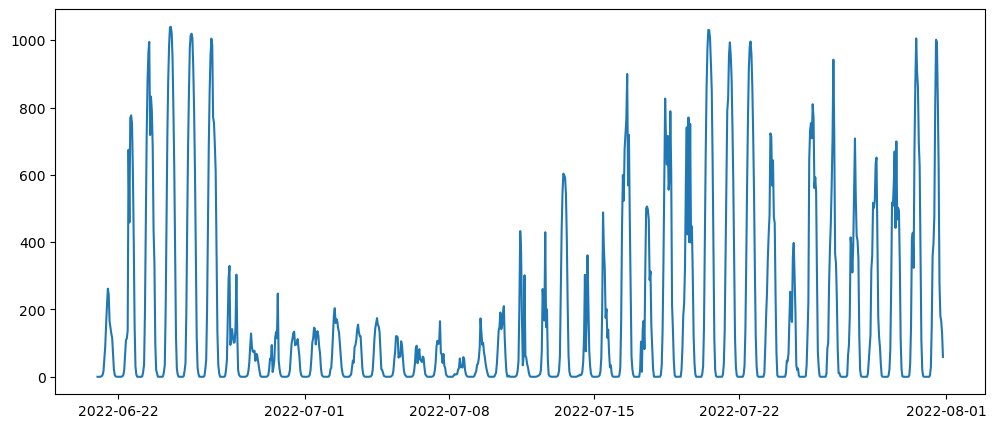

In [58]:
plt.figure(figsize=(12,5))
plt.plot(df_prod21.loc["2022-06-21 0:00:00":"2022-07-31 20:00:00"].target)

In [59]:
df_028

county  is_business  product_type  target  is_consumption  \
1829621       7            1             0     0.0               1   
1851639       7            1             0     0.0               1   
1851769       7            1             0     0.0               1   
1939471       7            1             0     0.0               1   
1939607       7            1             0     0.0               1   
1940015       7            1             0     0.0               1   
1962319       7            1             0     0.0               1   
1962591       7            1             0     0.0               1   
1962727       7            1             0     0.0               1   
1984907       7            1             0     0.0               1   
2007105       7            1             0     0.0               1   
2007235       7            1             0     0.0               1   
2007365       7            1             0     0.0               1   
2007495       7            1             0     0.0               1   
2007625       7            1             0     0.0               1   
2007755       7            1             0     0.0               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
1829621 2023-04-02 11:00:00            578  1829621                  28  
1851639 2023-04-09 12:00:00            585  1851639                  28  
1851769 2023-04-09 13:00:00            585  1851769                  28  
1939471 2023-05-07 10:00:00            613  1939471                  28  
1939607 2023-05-07 11:00:00            613  1939607                  28  
1940015 2023-05-07 14:00:00            613  1940015                  28  
1962319 2023-05-14 10:00:00            620  1962319                  28  
1962591 2023-05-14 12:00:00            620  1962591                  28  
1962727 2023-05-14 13:00:00            620  1962727                  28  
1984907 2023-05-21 10:00:00            627  1984907                  28  
2007105 2023-05-28 09:00:00            634  2007105                  28  
2007235 2023-05-28 10:00:00            634  2007235                  28  
2007365 2023-05-28 11:00:00            634  2007365                  28  
2007495 2023-05-28 12:00:00            634  2007495                  28  
2007625 2023-05-28 13:00:00            634  2007625                  28  
2007755 2023-05-28 14:00:00            634  2007755                  28

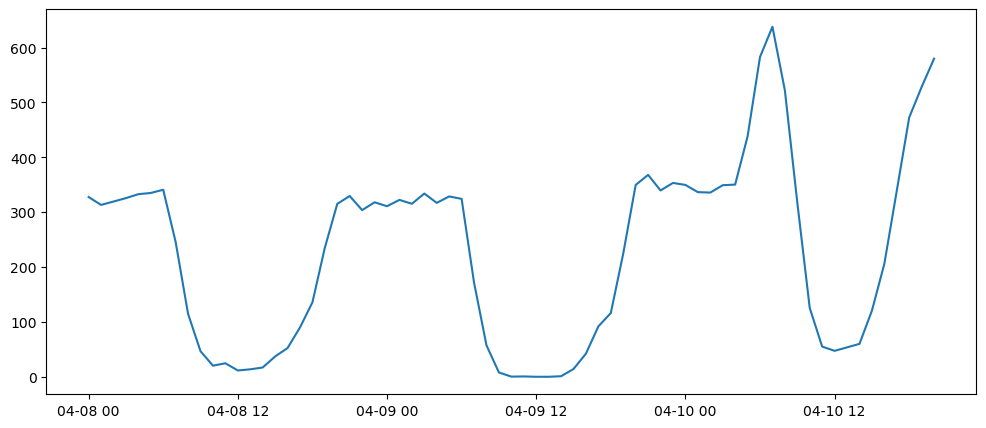

In [73]:
plt.figure(figsize=(12,5))
plt.plot(df_cons28.loc["2023-04-08 0:00:00":"2023-04-10 20:00:00"].target)

In [74]:
df_061

county  is_business  product_type  target  is_consumption  \
1982041       0            1             2     0.0               1   
1982175       0            1             2     0.0               1   
1984855       0            1             2     0.0               1   
1985391       0            1             2     0.0               1   
2001263       0            1             2     0.0               1   
2004299       0            1             2     0.0               1   
2004695       0            1             2     0.0               1   
2007183       0            1             2     0.0               1   
2007313       0            1             2     0.0               1   
2007443       0            1             2     0.0               1   
2016543       0            1             2     0.0               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
1982041 2023-05-20 13:00:00            626  1982041                  61  
1982175 2023-05-20 14:00:00            626  1982175                  61  
1984855 2023-05-21 10:00:00            627  1984855                  61  
1985391 2023-05-21 14:00:00            627  1985391                  61  
2001263 2023-05-26 13:00:00            632  2001263                  61  
2004299 2023-05-27 12:00:00            633  2004299                  61  
2004695 2023-05-27 15:00:00            633  2004695                  61  
2007183 2023-05-28 10:00:00            634  2007183                  61  
2007313 2023-05-28 11:00:00            634  2007313                  61  
2007443 2023-05-28 12:00:00            634  2007443                  61  
2016543 2023-05-31 10:00:00            637  2016543                  61

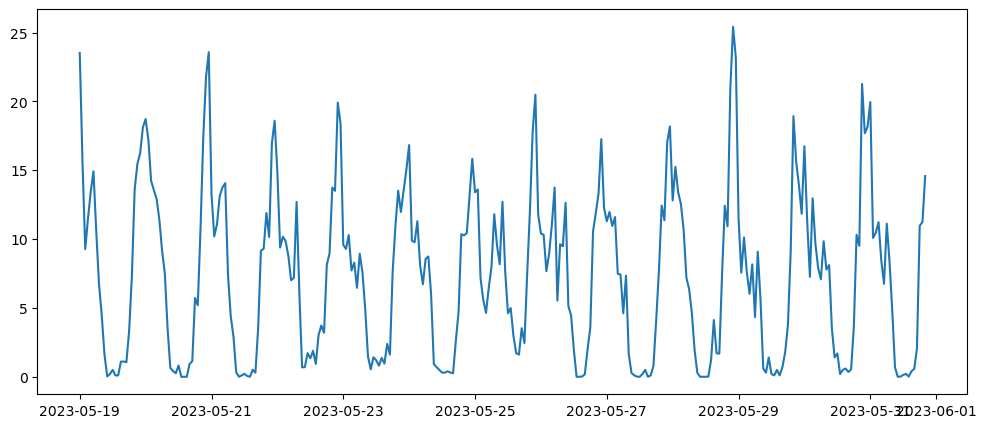

In [75]:
plt.figure(figsize=(12,5))
plt.plot(df_cons61.loc["2023-05-19 0:00:00":"2023-05-31 20:00:00"].target)

In [76]:
df_03

county  is_business  product_type  target  is_consumption  \
10133       0            1             0     0.0               1   
10255       0            1             0     0.0               1   
13183       0            1             0     0.0               1   
13427       0            1             0     0.0               1   
13549       0            1             0     0.0               1   
74671       0            1             0     0.0               1   
74793       0            1             0     0.0               1   

                 datetime  data_block_id  row_id  prediction_unit_id  
10133 2021-09-04 11:00:00              3   10133                   3  
10255 2021-09-04 12:00:00              3   10255                   3  
13183 2021-09-05 12:00:00              4   13183                   3  
13427 2021-09-05 14:00:00              4   13427                   3  
13549 2021-09-05 15:00:00              4   13549                   3  
74671 2021-09-26 12:00:00             25   74671                   3  
74793 2021-09-26 13:00:00             25   74793                   3

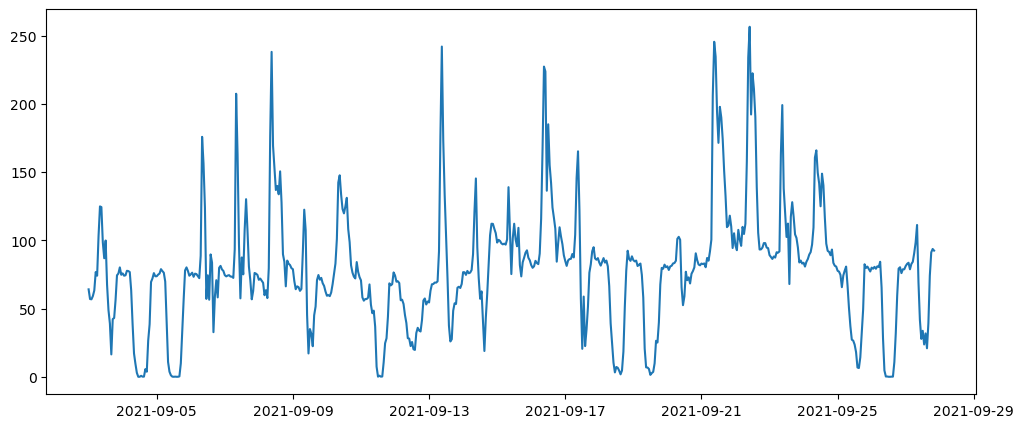

In [87]:
plt.figure(figsize=(12,5))
plt.plot(df_cons3.loc["2021-09-03 0:00:00":"2021-09-27 20:00:00"].target)

In [88]:
df_017

county  is_business  product_type  target  is_consumption  \
701305        4            1             0     0.0               1   
1129997       4            1             0     0.0               1   
1130129       4            1             0     0.0               1   
1174855       4            1             0     0.0               1   
1174989       4            1             0     0.0               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
701305  2022-04-16 14:00:00            227   701305                  17  
1129997 2022-08-28 13:00:00            361  1129997                  17  
1130129 2022-08-28 14:00:00            361  1130129                  17  
1174855 2022-09-11 13:00:00            375  1174855                  17  
1174989 2022-09-11 14:00:00            375  1174989                  17

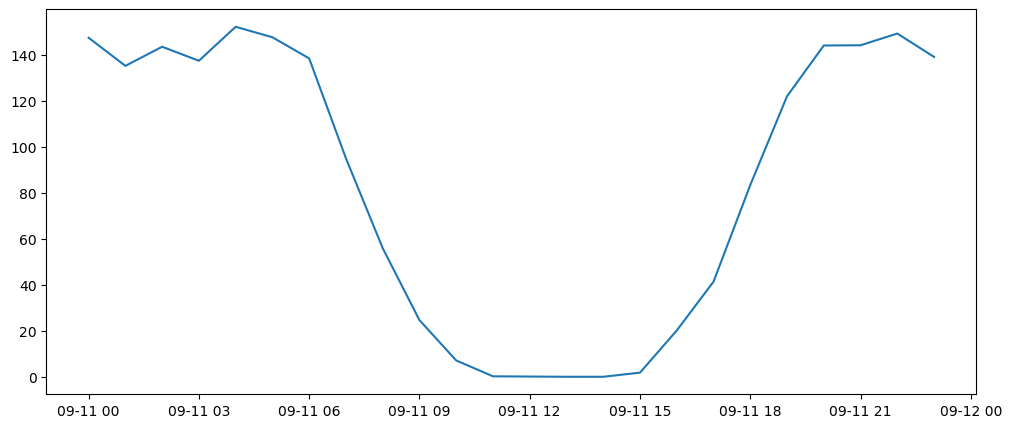

In [96]:
plt.figure(figsize=(12,5))
plt.plot(df_cons17.loc["2022-09-11 0:00:00	":"2022-09-11 23:00:00"].target)

In [97]:
df_066

county  is_business  product_type  target  is_consumption  \
1012783       4            1             1     0.0               1   
1012915       4            1             1     0.0               1   

                   datetime  data_block_id   row_id  prediction_unit_id  
1012783 2022-07-22 13:00:00            324  1012783                  66  
1012915 2022-07-22 14:00:00            324  1012915                  66

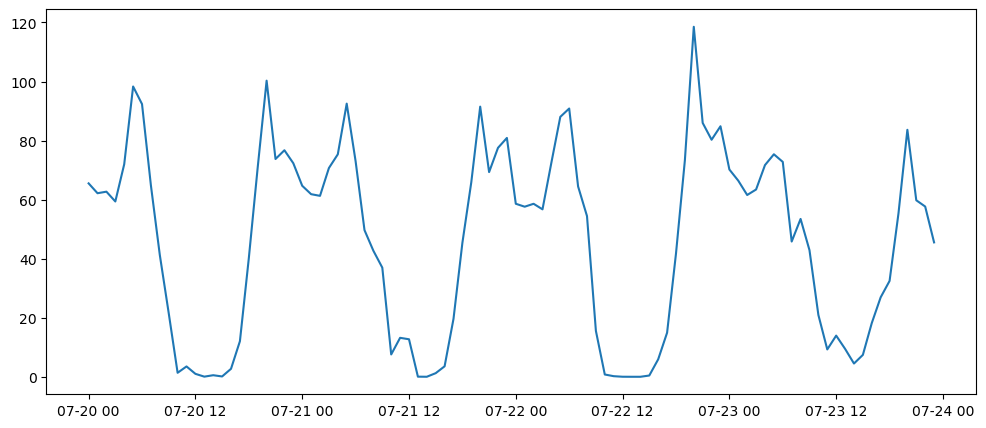

In [100]:
plt.figure(figsize=(12,5))
plt.plot(df_cons66.loc["2022-07-20 0:00:00	":"2022-07-23 23:00:00"].target)

- 여름: 생산량 ▲, 소비량 ▼
- 겨울: 생산량 ▼, 소비량 ▲

원인 추측

- 날씨적 요인 -> 태양열으로 생산 가능한 에너지 감소, 난방 사용 증가

- 여름에 자체적으로 생산 가능한 에너지 증가 -> 공급되는 전기 사용은 감소?